# Loading DATA

In [1]:
import numpy as np 
import pandas as pd 
import random 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
                              "Dynamic\nPromo ID","Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]


## Converting object columns to numerical
def convert_to_float(x):
  if x=="" or x in numerical_convertible_columns:
    return 0
  return float(x.replace(',',''))

##Removing % sign from Gross Margin Column Data
def p2f(x):
  if x=='' or x == "Gross Margin " or x == "Gross Margin %":
    return 0
  temp = x.strip('%') if x[-1] == "%" else x
  return float(temp.replace(',',''))

##Removing $ or () sign from Actual-Retail Column Data
def dollar_to_float(x):
  if x=="" or x == "Actual-Retail" or x == "Dynamic\nPromo ID" or x == "Dynamic Promo ID":
    return 0
  temp = x.strip(')') if x[-1] == ")" else x
  temp = temp[1:]  if temp[0] == '(' else temp
  temp = temp[1:]  if temp[0] == '$' else temp
  if x[0] == "-":
    return -1* dollar_to_float(temp[1:])
  else:
    return float(temp.replace(',',''))

In [3]:
data1718 = pd.read_csv("retail.csv",
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data1718.shape

(17328044, 39)

In [5]:
data1718.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
17328039,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901105411,10541,"PALMYRA PUSHBROOM 18""",1.0,...,7.29,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,2.0,Sale,Category Price Plan,NaN
17328040,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901121725,12172,WIRE BRUSH MINI SS 3PK,1.0,...,3.78,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,3.0,Sale,Category Price Plan,NaN
17328041,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,41785997888,1455567,BRUSH SCRUB HANG-UP,1.0,...,1.56,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,4.0,Sale,Category Price Plan,NaN
17328042,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,8.2091E+11,2301166,CM SLIDE LOCK KNIFE,1.0,...,4.82,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,5.0,Sale,Category Price Plan,NaN
17328043,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
data1516 = pd.read_csv("costello_ace_2015-2016.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

In [7]:
data1516.shape

(15627499, 39)

In [8]:
pd.set_option('display.max_columns',
              500)

data1516.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
15627494,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1.0,2.10,1.68,0.42,20.00,80,SPORTING GOODS,856,STRETCH CORDS/TARP STRAPS,85601,STRETCH CORDS/HOOKS,1.0,NaN,NaN,0.0,2.10,5.99,3.89,Y,Alternate Tender,3.89,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,1.0,Sale,Category Price Plan,NaN
15627495,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1.0,3.06,2.45,0.61,19.93,70,"LAWN, GARDEN & FARM SUPPLIES",774,TARPS,77401,POLY TARPS,1.0,NaN,NaN,0.0,3.06,7.99,4.93,Y,Alternate Tender,4.93,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,2.0,Sale,Category Price Plan,NaN
15627496,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1.0,2.00,1.60,0.40,20.00,10,CLEANING SUPPLIES,105,GLASS/PLASTIC CLEANERS,10505,SPRAYERS,1.0,NaN,NaN,0.0,2.00,3.99,1.99,Y,Alternate Tender,1.99,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,3.0,Sale,Category Price Plan,NaN
15627497,9/30/2016,21:29:00,507179,B84423,S,16147 CALDWELL,49000007640,CO5964,SPRITE 20OZ,1.0,1.19,0.95,0.24,20.17,9,SODA/ETC,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,1.19,1.99,0.80,Y,Alternate Tender,0.80,7063,NaN,1.9818e+09,GEORGE TAYLOR,Sale,1.0,Sale,Category Price Plan,NaN
15627498,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Cleaning Data

In [9]:
def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1516.index[data1516[column_name] == column_name].tolist()

rows_to_be_deleted_1 = [15627498]
for col in data1516.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_1)

print(len(np.unique(rows_to_be_deleted_1)))

def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1718.index[data1718[column_name] == column_name].tolist()

rows_to_be_deleted_2 = [17328043]
for col in data1718.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_2)

print(len(np.unique(rows_to_be_deleted_2)))

/usr/local/lib/python3.5/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


24
24


In [10]:
print(data1516.shape)
temp_df_1 = data1516.drop(rows_to_be_deleted_1)
print(temp_df_1.shape)

(15627499, 39)
(15627475, 39)


In [11]:
print(data1718.shape)
temp_df_2 = data1718.drop(rows_to_be_deleted_2)
print(temp_df_2.shape)

(17328044, 39)
(17328020, 39)


In [12]:
data1516 = temp_df_1
data1718 = temp_df_2

In [13]:
import gc
del temp_df_1, temp_df_2
gc.collect()

0

In [14]:
##Zip Code has 'NY'

# numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
#                               "Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]

# def RepresentsInt(s):
#   try: 
#     train_data[s].astype(str).str.replace(",","").astype(float) 
#     return True
#   except Exception as e:
#     print(s)
#     print(str(e))
#     return False
# num =[]  
# for v in numerical_convertible_columns:
#   if RepresentsInt(v):
#     num.append(v)
# num

## CLEANING 2015-16

In [15]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Grand Summaries' does not match format '%m/%d/%Y' (match)


In [16]:
data1516.loc[data1516['Date'] == 'Grand Summaries']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2198827,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5721680,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
# data1516.iloc[data1516['Date'] == 'Grand Summaries']
droplist = data1516.index[data1516['Date'] == 'Grand Summaries'].tolist()
print(droplist)

[2198827, 5721680]


In [18]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [19]:
droplist = data1516.index[data1516['Date'] == 'Count = 682060'].tolist()
print(droplist)

[2198828]


In [20]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [21]:
data1516.index[data1516['Date'] == 'Count = 682060'].tolist()

[]

In [22]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Count = 483724' does not match format '%m/%d/%Y' (match)


In [23]:
droplist = data1516.index[data1516['Date'] == 'Count = 483724'].tolist()
print(droplist)

[5721681]


In [24]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [25]:
data1516.index[data1516['Date'] == 'Count = 483724'].tolist()

[]

In [26]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [27]:
data1516.shape

(15627471, 39)

## CLEANING 2017-18

In [28]:
try:
    pd.to_datetime(data1718['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [29]:
data1718.shape

(17328020, 39)

## COMBINING DATAFRAMES 

In [30]:
frames = [data1516,data1718]
train_data = pd.concat(frames).reset_index(drop=True)

In [31]:
train_data.shape

(32955491, 39)

In [32]:
train_data.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN


In [33]:
train_data[train_data.index.duplicated()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [34]:
import gc
del data1516, data1718
gc.collect()

0

In [35]:
try:
  pd.to_datetime(train_data['Transaction Time'], format='%H:%M:%S', errors='raise')
except Exception as e:
  print(e)

In [36]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Customer Number         107
Scanned UPC          174798
Department Code          89
Class Code           429338
Class Name                3
Fineline Code       4126931
MIP Promo ID       27901181
Promo/Discount     25975311
Tender Type               1
Zip Code           10473835
Zip Plus-4         12815651
Loyalty ID         10324840
Clerk                   936
Pricing Source        50922
Return Code        31832090
dtype: int64

In [37]:
def find_cols():
  cat_columns = []
  num_columns = []
  for i in train_data.columns:
    if train_data[i].dtype=='object' :
      cat_columns.append(i)
    else:
      num_columns.append(i)
  print("-----------Numerical Columns------------")
  print(num_columns)
  print("----------Categorical Columns-----------")
  print(cat_columns)

find_cols()

-----------Numerical Columns------------
['Net Sales Units', 'Net Sales', 'Cost', 'Gross Margin', 'Gross Margin %', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail', '$ Off Retail', 'Line #']
----------Categorical Columns-----------
['Date', 'Transaction Time', 'Customer Number', 'Receipt Number', 'Store #', 'Store Name', 'Scanned UPC', 'Item Number', 'Item Description', 'Department Code', 'Department Name', 'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name', 'MIP Promo ID', 'Promo/Discount', 'Taxable', 'Tender Type', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk', 'Item Type', 'Line Item Transaction Type', 'Pricing Source', 'Return Code']


# IMPUTING NANs

## Customer Number

In [38]:
train_data[train_data["Customer Number"]=="*5"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN
5,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901720836,72083,GLOVE LTHR PALM LG,1.0,4.99,2.10,2.89,57.92,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,4.0,Sale,Retail,NaN
6,4/1/2015,7:31:55,*5,E89651,B,14252 ISLAND PARK,82901069294,1099332,SANDSPONG MED WEDG ACE,1.0,3.99,0.91,3.08,77.19,14,PAINT & PAINT SUPPLIES,150,HAND/POWER SANDING ABRASI,15003,HAND SANDING ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,GABRIELA PARATORE,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955463,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,3.0,2.67,1.07,1.60,59.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.89,0.00,0.89,Y,Alternate Tender,-0.89,NaN,NaN,NaN,SUSAN MAURICE,Sale,2.0,Sale,Manual Override,NaN
32955464,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,2.00,0.80,1.20,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,1.00,0.00,1.00,Y,Alternate Tender,-1.00,NaN,NaN,NaN,SUSAN MAURICE,Sale,3.0,Sale,Manual Override,NaN
32955465,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,0.98,0.39,0.59,60.20,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.49,0.00,0.49,Y,Alternate Tender,-0.49,NaN,NaN,NaN,SUSAN MAURICE,Sale,4.0,Sale,Manual Override,NaN
32955484,9/30/2018,18:21:20,*5,B02347,I,15110 GARDEN CITY PARK,76706844002,7104888,TRAP SPIDER & CRICKET PK,2.0,13.98,5.38,8.60,61.52,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75004,INSECT BAITS/TRAPS,1.0,2082918,S,0.0,6.99,8.99,2.00,Y,Alternate Tender,2.00,NaN,NaN,NaN,MARK SMILOWITZ,Sale,1.0,Sale,Promotion,NaN


In [39]:
train_data["Customer Number"] = train_data["Customer Number"].fillna("*5")

In [40]:
train_data[train_data["Customer Number"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Store #

In [41]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [42]:
len(train_data["Store Name"].unique().tolist())

32

## Scanned UPC

In [43]:
train_data[train_data["Scanned UPC"].str.isalpha()==True]['Scanned UPC'].unique()

array(['OTHER', 'QF', 'LOGS', 'AUTO', 'ROUNDUP', 'GGARDEN', 'GGIFT',
       'RAZZLE', 'ISMERCH', 'GSNOW', 'HARDBOARD', 'STDPINE', 'GPAINT',
       'GOURDS', 'HAYBALE', 'FBWETMOP', 'JGSOIL', 'SPECIAL'], dtype=object)

In [44]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Scanned UPC"].isnull()].tolist())]["Item Number"].unique().tolist()
scan = train_data[train_data["Item Number"].isin(item_nums)]["Scanned UPC"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, scan))
temp = train_data[train_data["Scanned UPC"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
69,4/1/2015,7:58:56,88820,4298,P,15784 EI PAINT,NaN,12992,PAINTBRS CHIP 1.5WT BRSL,4.0,5.72,0.83,4.89,85.49,14,PAINT & PAINT SUPPLIES,131,PAINT BRUSHES,13106,SINGLE USE/TOSS-AWAY,1.0,NaN,Q,0.0,1.43,1.79,0.36,Y,Charge Tender,0.36,11730,NaN,1.98202e+09,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Category Price Plan,NaN
130,4/1/2015,8:05:32,10000,A35835,P,15784 EI PAINT,NaN,1081249,SHERLOCK EXT POLE 2-4',1.0,31.49,14.14,17.35,55.10,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,31.49,34.99,3.50,Y,Bankcard Tender,3.50,NaN,NaN,1.98149e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
369,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,73705834,.5 MIL 9X12 DROP 5PK,1.0,6.99,3.11,3.88,55.51,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,1.0,Sale,Retail,NaN
370,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,1395151,"DELUXE METAL TRAY 11""",1.0,5.99,2.19,3.80,63.44,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17110,TRAYS AND FRAMES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Retail,NaN
820,4/1/2015,9:10:22,*5,F19982,E,14664 NORTH MASSAPEQUA,NaN,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,6.00,2.40,3.60,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,1.0,NaN,NaN,0.0,6.00,0.00,6.00,Y,Cash Tender,-6.00,NaN,NaN,NaN,MICHELLE LYNAM STRIBULA,Sale,1.0,Sale,Manual Override,NaN


In [45]:
train_data[train_data["Scanned UPC"].isnull()]["Scanned UPC"] = temp["Item Number"].map(mapping)
train_data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32955491, 39)

In [46]:
import gc
del temp
gc.collect()

0

## Item Number

In [47]:
train_data[train_data['Item Number']=="56"][['Item Number', 'Item Description', 'Scanned UPC']]

,Item Number,Item Description,Scanned UPC
54,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
55,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
56,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
90,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
91,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
...,...,...,...
32955461,56,FASTENERS,OTHER
32955462,56,FASTENERS,OTHER
32955463,56,FASTENERS,OTHER
32955464,56,FASTENERS,OTHER


## Department Code

In [48]:
dept_names = train_data[train_data.index.isin(train_data.index[train_data["Department Code"].isnull()].tolist())]["Department Name"].unique().tolist()
dept_code = train_data[train_data["Department Name"].isin(dept_names)]["Department Code"].tolist()
dept = train_data[train_data["Department Name"].isin(dept_names)]["Department Name"].tolist()
mapping = dict(zip(dept, dept_code))
temp = train_data[train_data["Department Code"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3422832,12/2/2016,9:37:34,*A94K5,I45809,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,21037,1957,1.90118e+09,UNKNOWN CLERK KMCPOS,Sale,4.0,Sale,Promotion,NaN
3423209,12/2/2016,9:47:34,*AC9TK,I45817,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21144,1907,1.93344e+09,UNKNOWN CLERK KMCPOS,Sale,3.0,Sale,Promotion,NaN
3468908,12/3/2016,11:44:14,*AB3Z5,I46680,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21035,2230,1.9222e+09,UNKNOWN CLERK AAMPOS,Sale,3.0,Sale,Promotion,NaN
3474239,12/3/2016,12:31:18,*AC2YH,I46795,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,20711,9672,1.92857e+09,UNKNOWN CLERK RMLPOS,Sale,4.0,Sale,Promotion,NaN
3490432,12/3/2016,14:48:58,*A96T6,I47083,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,NaN,NaN,NaN,UNKNOWN CLERK AAMPOS,Sale,4.0,Sale,Promotion,NaN


In [49]:
mapping

{'BLANK': nan}

In [50]:
train_data["Department Code"] = train_data["Department Code"].fillna("NaN")

In [51]:
train_data[train_data["Department Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Name

In [52]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Class Name"].isnull()].tolist())]["Item Number"].unique().tolist()
class_names = train_data[train_data["Item Number"].isin(item_nums)]["Class Name"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, class_names))
temp = train_data[train_data["Class Name"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
21062605,2/2/2018,14:38:03,4250,18101,G,14874 WEST BABYLON,OTHER,1802628D,CARPET DRYER FAN 4.8A,1.0,251.99,163.20,88.79,35.24,10,CLEANING SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,251.99,279.99,28.0,Y,Charge Tender,28.0,11704,NaN,1.98173e+09,DOROTHY MARANO,Sale,1.0,Sale,Category Price Plan,NaN
24181335,7/30/2018,9:10:15,2045,I36840,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,30.59,15.25,15.34,50.15,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,30.59,33.99,3.4,N,Bankcard Tender,3.4,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,7.0,Sale,Category Price Plan,NaN
31472263,10/24/2018,11:10:39,2045,I43307,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,31.49,15.25,16.24,51.57,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,31.49,34.99,3.5,N,Bankcard Tender,3.5,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,22.0,Sale,Category Price Plan,NaN


In [53]:
mapping

{'1802628D': nan, '1839141D': nan}

In [54]:
train_data["Class Name"] = train_data["Class Name"].fillna("NaN")

In [55]:
train_data[train_data["Class Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Code 

In [56]:
item_nums = train_data[train_data["Class Code"].isnull()]['Class Name'].unique().tolist()
item_nums

['BLANK']

In [57]:
train_data[train_data['Class Name']=='BLANK'].shape

(429338, 39)

In [58]:
train_data["Class Code"] = train_data["Class Code"].fillna("NaN")

In [59]:
train_data[train_data["Class Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Fineline Name

In [60]:
train_data[train_data["Fineline Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [61]:
train_data[train_data["Fineline Code"].isnull()].shape

(4126931, 39)

In [62]:
item_nums = train_data[train_data["Fineline Code"].isnull()]['Fineline Name'].unique().tolist()
item_nums

['BLANK']

In [63]:
train_data["Fineline Code"] = train_data["Fineline Code"].fillna("NaN")

In [64]:
train_data[train_data["Fineline Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Customer Number

In [65]:
len(train_data[train_data['Customer Number'].str.startswith('*')][train_data['Zip Code'].isnull()])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10300357

In [66]:
train_data[train_data['Customer Number']=='*5'][~train_data['Zip Code'].isnull()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
190323,4/11/2015,11:34:42,*5,H78772,F,14822 NORTHPORT,7.2865E+11,4567756,"STEEL FIREPIT 26""",1.0,29.99,27.29,2.70,9.00,46,HEATING & COOLING SUPPLIES,456,PATIO HEATERS & FIREPITS,45602,OUTDOOR GAS FIREPITS,1.0,1150409,S,0.0,29.99,44.99,15.0,Y,Cash Tender,15.0,11729,4402,1.90591e+09,KATHLEEN GORNEY,Sale,1.0,Sale,Promotion,NaN
281154,4/14/2015,14:38:13,*5,F02120,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,0.10,0.04,0.06,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.10,0.00,0.1,Y,Cash Tender,-0.1,11729,4402,1.90591e+09,GABRIELA PARATORE,Sale,1.0,Sale,Manual Override,NaN
1891047,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,073187670120,8036592,HTH SUPER CLARIFIER QT,1.0,14.99,6.89,8.10,54.04,80,SPORTING GOODS,855,POOL CHEMICALS & MAINTENA,085501,POOL CHEMICALS,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,1.0,Sale,Retail,NaN
1891048,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,855989006242,EA1173,MICRO NYLON WIRE 3'-ASST,1.0,4.99,2.00,2.99,59.92,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,036904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,4.99,4.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,2.0,Sale,Retail,NaN
2241706,8/2/2015,17:14:11,*5,G32659,B,14252 ISLAND PARK,77924074158,8212698,"QCC1 HOSE & REGULATOR21""",1.0,34.99,13.68,21.31,60.90,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86906,GAS GRILL PARTS,1.0,NaN,NaN,0.0,34.99,34.99,0.0,Y,Bankcard Tender,0.0,11729,4402,1.90591e+09,AMANDA COMPETIELLO,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360731,5/13/2017,16:15:50,*5,158827,Y,16663 EDGEWATER,OTHER,56,FASTENERS,1.0,0.00,0.00,0.00,0.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.00,0.00,0.0,Y,No Tender,0.0,11729,4402,1.90591e+09,LUKE ROLEN,Sale,1.0,Sale,Manual Override,NaN
28489593,5/21/2018,10:44:36,*5,J76940,W,16660 GLEN BURNIE,OTHER,700793,2CF RED COLORED MULCH,2.0,8.98,4.66,4.32,48.11,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74610,DECO MULCH - LARGE BAG,5.0,NaN,NaN,0.0,4.49,4.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,CECILIA FINSTAD,Sale,1.0,Sale,Retail,NaN
28882584,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098439,2340495,"HAMMER BIT 1/8""X1-1/2""X3",1.0,8.49,4.12,4.37,51.47,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,1.0,Sale,Retail,NaN
28882586,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098514,2339968,"HAMMER BIT 5/16""X4""X6""",1.0,8.49,3.18,5.31,62.54,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,2.0,Sale,Retail,NaN


## Clerk

In [67]:
train_data[train_data['Clerk'].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
24235995,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,8.43518E+11,81960,BBQ TOOL SET 3PC SS/WOOD,1.0,9.41,7.84,1.57,16.68,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86901,BBQ TOOL SETS,1.0,NaN,NaN,0.0,9.41,17.99,8.58,Y,Bankcard Tender,8.58,11702,NaN,1.98149e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
24235996,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,7.83988E+11,8395568,PIGS ASS RUB SEASON6.5OZ,1.0,4.97,4.14,0.83,16.70,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86909,NO LONGER IN USE,1.0,NaN,NaN,0.0,4.97,7.99,3.02,N,Bankcard Tender,3.02,11702,NaN,1.98149e+09,NaN,Sale,2.0,Sale,Category Price Plan,NaN
24235997,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,32076894184,3013349,"STAPLE COAXL WH 1/4""CD50",1.0,1.69,1.41,0.28,16.57,34,ELECTRICAL SUPPLIES,316,STRAPS/STAPLES/CONNECTORS,31604,STAPLES,1.0,NaN,NaN,0.0,1.69,5.99,4.30,Y,Bankcard Tender,4.30,11702,NaN,1.98149e+09,NaN,Sale,3.0,Sale,Category Price Plan,NaN
24235998,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,82901001898,4008561,RING WAX EXTENDER KIT,1.0,4.63,3.85,0.78,16.85,40,PLUMBING SUPPLIES & FIXTURES,409,TOILET REPAIR,40901,WAX GASKET RINGS,1.0,NaN,NaN,0.0,4.63,8.99,4.36,Y,Bankcard Tender,4.36,11702,NaN,1.98149e+09,NaN,Sale,4.0,Sale,Category Price Plan,NaN
24236070,6/1/2017,13:09:59,509135,I82269,G,14874 WEST BABYLON,6.1127E+11,9274655,RED BULL ENRGY DRNK 12OZ,1.0,2.59,2.16,0.43,16.60,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,2.59,4.19,1.60,Y,Cash Tender,1.60,11726,NaN,1.9818e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844143,5/30/2017,10:48:37,*5,I81641,G,14874 WEST BABYLON,OTHER,56,FASTENERS,1.0,0.30,0.12,0.18,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.30,0.00,0.30,Y,Cash Tender,-0.30,NaN,NaN,NaN,NaN,Sale,2.0,Sale,Manual Override,NaN
27844197,5/30/2017,10:50:28,202081,I81642,G,14874 WEST BABYLON,37155675746,4258141,CARTRIDGE MOEN PLSTC LL,-1.0,-19.99,-7.73,-12.26,61.33,40,PLUMBING SUPPLIES & FIXTURES,401,FAUCET PARTS,40101,STEMS,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,11704,7914,1.91582e+09,NaN,Return,1.0,Return,Return Validation,W
27844710,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-1.0,-2.99,-0.75,-2.24,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Defective,1.0,Defective,Return Validation,D
27844711,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-2.0,-5.98,-1.50,-4.48,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Return,3.0,Return,Return Validation,W


## Loyalty ID

In [95]:
train_data["Loyalty ID"] = train_data["Loyalty ID"].fillna("NaN")

In [68]:
import gc
del temp
gc.collect()

11

# APRIORI

In [69]:
# non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
#        'IN STORE COUPONS',
#        'LIPA INSTANT REBATE',
#        'MISCELANEOUS SALES',
#        'COSTELLOS GIFT CARD',
#        'HHC COUPONS AND CERTIFICATES', 
#       'GIFT CARD', 'DEPOSITS', 'LABOR',
#        'GIFT CARD OFFSET (SPECL PROMO)', 
#       'SPECIAL ORDER',
#        'OTHER INCOME',
#       'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
#         'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
#         'UNIFORM','HELPFUL HARDWARE',
#         'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
#        'WARRANTY','STORE SERVICES (ACE)', 
#        'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
#         'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','DONTATIONS']



non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 
                      'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS',
                'COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT',
                      'BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']

# def size(obj):
#     return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

# def set_order_store_df(name):
#   orders = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
#   print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
#       .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
#   return orders

# def set_order_dyn_promo_store_df(name):
#   orders = train_data[~train_data['Department Name'].isin(non_items_dept)][~train_data["Dynamic Promo ID"].isnull()]\
#   [train_data['Dynamic Promo ID']>0][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
#   print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
#       .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
#   return orders

### can we use apriori result to understand which department/class that is mostly bought and add it to rewards membership?

In [70]:
pd.set_option('display.max_rows', None)

In [116]:
train_data[train_data['Item Description']=='FASTENERS/SCREWS/NAILS/BOLTS ETC'].head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
54,2015-04-01,7:55:33,3120,19280,2,7504 GRAND BLVD,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,12.0,7.08,3.12,3.96,55.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.59,0.0,0.59,N,Charge Tender,-0.59,11729,NaN,1.98173e+09,JAMES RUCKER,Sale,1.0,Sale,Category Price Plan,NaN
55,2015-04-01,7:55:33,3120,19280,2,7504 GRAND BLVD,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,12.0,9.24,4.08,5.16,55.84,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.77,0.0,0.77,N,Charge Tender,-0.77,11729,NaN,1.98173e+09,JAMES RUCKER,Sale,2.0,Sale,Category Price Plan,NaN
56,2015-04-01,7:55:33,3120,19280,2,7504 GRAND BLVD,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,12.0,10.32,4.56,5.76,55.81,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.86,0.0,0.86,N,Charge Tender,-0.86,11729,NaN,1.98173e+09,JAMES RUCKER,Sale,3.0,Sale,Category Price Plan,NaN
90,2015-04-01,8:01:08,*5,A12705,6,11116 BELLMORE,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,4.0,0.60,0.24,0.36,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.15,0.0,0.15,Y,Cash Tender,-0.15,NaN,NaN,NaN,GERRY T,Sale,3.0,Sale,Manual Override,NaN
91,2015-04-01,8:01:08,*5,A12705,6,11116 BELLMORE,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,3.0,0.66,0.26,0.40,60.61,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.22,0.0,0.22,Y,Cash Tender,-0.22,NaN,NaN,NaN,GERRY T,Sale,4.0,Sale,Manual Override,NaN


In [113]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        [train_data['Loyalty ID']=='NaN'].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.sort_values(by=['support'], ascending=False)
# rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018101,0.016657,0.003030,0.167381,10.048793,0.002728,1.181024
7,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.016657,0.018101,0.003030,0.181898,10.048793,0.002728,1.200215
2,(BISSELL CLEANING FEE),(BISSELL RENTAL DEPOSIT),0.001411,0.001522,0.001323,0.938144,616.313021,0.001321,16.142058
3,(BISSELL RENTAL DEPOSIT),(BISSELL CLEANING FEE),0.001522,0.001411,0.001323,0.869427,616.313021,0.001321,7.647733
0,(KEY KWIKSET KW1-ACE250PK),(KEY ARROW AR1-ACE),0.018101,0.007562,0.001076,0.059454,7.861681,0.000939,1.055171
1,(KEY ARROW AR1-ACE),(KEY KWIKSET KW1-ACE250PK),0.007562,0.018101,0.001076,0.142308,7.861681,0.000939,1.144814
4,(KEY SCHLAGE SC1-ACE250PK),(KEY ARROW AR1-ACE),0.016657,0.007562,0.001008,0.060536,8.004734,0.000882,1.056386
5,(KEY ARROW AR1-ACE),(KEY SCHLAGE SC1-ACE250PK),0.007562,0.016657,0.001008,0.133333,8.004734,0.000882,1.134627


In [89]:
import networkx as nx  

def draw_graph(rules, rules_to_show):
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    G1.add_nodes_from([rules.iloc[i]['antecedents']])
    G1.add_edge(rules.iloc[i]['antecedents'], "R"+str(i), color=colors[i] , weight = 3)
    G1.add_nodes_from([])
    G1.add_edge("R"+str(i), rules.iloc[i]['consequents'], color=colors[i],  weight= 3)
  for node in G1:
    found_a_string = False
    for item in strs: 
        if node==item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('green')       
 
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=range(20), width=weights,\
          edge_cmap=plt.cm.Blues,font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

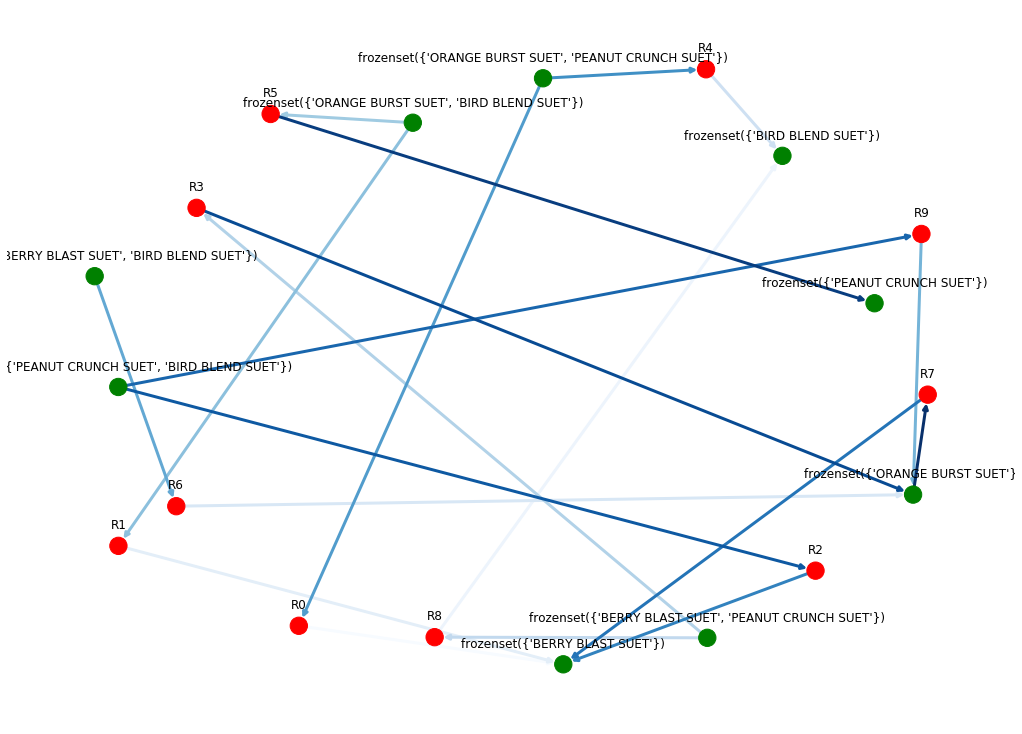

In [90]:
temp_rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
plt.figure(figsize=(14,10))
plt.gcf().clear()
draw_graph(temp_rules, 10)

In the plot, red dot represents rules and green dots represents itemsets. From the plot, we can observe the relation between 2 or 3 items. For example, Rule R5 reprepsents the relation between itemset (ORANGE BURST SUET, BIRD BLEND SUET) and PEANUT CRUNCH SUET. Arrow coming into a rule represents an antecedent and an arrow coming out of a rule (red dot) represents a consequent. This means people buying ORANGE BURST SUET and BIRD BLEND SUET will most probably buy PEANUT CRUNCH SUET.


In [101]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [102]:
spring = [3, 4, 5]
summer = [6,7,8]
fall = [9,10,11]
winter = [1,2,12]

In [103]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [112]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        [train_data['Date'].dt.month.isin(winter)][train_data['Loyalty ID']=='NaN']\
    .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.sort_values(by=['support'], ascending=False)
# rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013190,0.013085,0.002148,0.162884,12.448447,0.001976,1.178947
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.013085,0.013190,0.002148,0.164199,12.448447,0.001976,1.180676


# APRIORI and FP ALGO 

## STORE # 1

### Spring

In [73]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.003683,0.003683,0.002634,0.715190,194.187630,0.002620,3.498180
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003683,0.003683,0.002634,0.715190,194.187630,0.002620,3.498180
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.013450,0.017203,0.002681,0.199307,11.585718,0.002449,1.227433
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.017203,0.013450,0.002681,0.155827,11.585718,0.002449,1.168658


### SUMMER

In [74]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(CLAMP 11/16 TO 1-1/2""SS)","(COUPLE INSERT POLY 1"")",0.004025,0.004883,0.001562,0.387978,79.455127,0.001542,1.625950
3,"(COUPLE INSERT POLY 1"")","(CLAMP 11/16 TO 1-1/2""SS)",0.004883,0.004025,0.001562,0.319820,79.455127,0.001542,1.464281
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.013285,0.016958,0.002134,0.160596,9.469958,0.001908,1.171119
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.016958,0.013285,0.002134,0.125811,9.469958,0.001908,1.128720


### FALL

In [75]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014972,0.018181,0.002394,0.159864,8.792965,0.002121,1.168643
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018181,0.014972,0.002394,0.131653,8.792965,0.002121,1.134370


### WINTER

In [76]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.018428,0.021291,0.003224,0.174962,8.217746,0.002832,1.186260
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.021291,0.018428,0.003224,0.151436,8.217746,0.002832,1.156745


## NON SEASONAL

In [72]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

    
no_of_items = len(train_data[~train_data['Department Name'].isin(non_items_dept)]\
                  [train_data['Store #']=='1']["Item Description"].unique().tolist())

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
1,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
2,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
3,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830


In [81]:
import gc
del test, df, rules
gc.collect()

10668

## STORE # 2

In [77]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='2']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(WEED & FEED 5M),(LAWN FOOD 5M),0.002818,0.003623,0.002379,0.844156,232.978486,0.002369,6.393417
3,(LAWN FOOD 5M),(WEED & FEED 5M),0.003623,0.002818,0.002379,0.656566,232.978486,0.002369,2.903559
1,(SUFFOLK COUNTY BAG CHARGE),(FASTENERS),0.006478,0.086996,0.001610,0.248588,2.857450,0.001047,1.215050
0,(FASTENERS),(SUFFOLK COUNTY BAG CHARGE),0.086996,0.006478,0.001610,0.018511,2.857450,0.001047,1.012260


In [78]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='2']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.005526,0.011899,0.001031,0.186667,15.687513,0.000966,1.214878
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011899,0.005526,0.001031,0.086687,15.687513,0.000966,1.088865


In [79]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='2']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(REGISTER 4WAY 8X8 WHT, DRYER VENT DUCT4""X8FT AL)",(REGISTER 4WAY 6X6 WHT),0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
6,"(DRYER VENT DUCT4""X8FT AL, REGISTER 4WAY 6X6 WHT)",(REGISTER 4WAY 8X8 WHT),0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
7,(REGISTER 4WAY 8X8 WHT),"(DRYER VENT DUCT4""X8FT AL, REGISTER 4WAY 6X6 WHT)",0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
9,(REGISTER 4WAY 6X6 WHT),"(REGISTER 4WAY 8X8 WHT, DRYER VENT DUCT4""X8FT AL)",0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
10,(REGISTER 4WAY 8X8 WHT),(REGISTER 4WAY 6X6 WHT),0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
11,(REGISTER 4WAY 6X6 WHT),(REGISTER 4WAY 8X8 WHT),0.001133,0.001133,0.001133,1.000000,882.642857,0.001132,inf
0,(REGISTER 4WAY 8X8 WHT),"(DRYER VENT DUCT4""X8FT AL)",0.001133,0.001254,0.001133,1.000000,797.225806,0.001132,inf
3,(REGISTER 4WAY 6X6 WHT),"(DRYER VENT DUCT4""X8FT AL)",0.001133,0.001254,0.001133,1.000000,797.225806,0.001132,inf
5,"(REGISTER 4WAY 8X8 WHT, REGISTER 4WAY 6X6 WHT)","(DRYER VENT DUCT4""X8FT AL)",0.001133,0.001254,0.001133,1.000000,797.225806,0.001132,inf
1,"(DRYER VENT DUCT4""X8FT AL)",(REGISTER 4WAY 8X8 WHT),0.001254,0.001133,0.001133,0.903226,797.225806,0.001132,10.321626


In [80]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='2']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ICE MELT 40# PAIL ACE),(ICE MELT 40# BAG ACE),0.001186,0.004998,0.001186,1.000000,200.067797,0.001180,inf
5,(PLASTIC PL LID F/3.5&5G),(PLSTC BUCKET 5G WHT ACE),0.001059,0.002245,0.001017,0.960000,427.616604,0.001014,24.943875
4,(PLSTC BUCKET 5G WHT ACE),(PLASTIC PL LID F/3.5&5G),0.002245,0.001059,0.001017,0.452830,427.616604,0.001014,1.825651
3,(ICE MELT 40# BAG ACE),(ICE MELT 40# PAIL ACE),0.004998,0.001186,0.001186,0.237288,200.067797,0.001180,1.309556
1,(SUFFOLK COUNTY BAG CHARGE),(FASTENERS),0.008048,0.080566,0.001525,0.189474,2.351785,0.000877,1.134367
0,(FASTENERS),(SUFFOLK COUNTY BAG CHARGE),0.080566,0.008048,0.001525,0.018927,2.351785,0.000877,1.011089


In [82]:
# no_of_items = len(train_data[~train_data['Department Name'].isin(non_items_dept)]\
#                   [train_data['Store #']=='1']["Item Description"].unique().tolist())

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='2']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CMN Donations),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.016727,0.100169,0.001323,0.079070,0.789362,-0.000353,0.977089
1,(CMN Donations),(FASTENERS),0.016727,0.084842,0.001264,0.075581,0.890845,-0.000155,0.989982
0,(FASTENERS),(CMN Donations),0.084842,0.016727,0.001264,0.014901,0.890845,-0.000155,0.998147
3,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(CMN Donations),0.100169,0.016727,0.001323,0.013204,0.789362,-0.000353,0.996429


In [83]:
import gc
del test, df, rules
gc.collect()

18149

## STORE # 3

In [81]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='3']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(LAWN FOOD 5M),(WEED & FEED 5M),0.004719,0.005623,0.003270,0.692819,123.206596,0.003243,3.237105
1,(PROPANE CYLINDER 20LBS),(PROPANE FILL 20 LB),0.004895,0.046335,0.003226,0.658974,14.221904,0.002999,2.796461
2,(WEED & FEED 5M),(LAWN FOOD 5M),0.005623,0.004719,0.003270,0.581473,123.206596,0.003243,2.378057
5,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007638,0.009646,0.001148,0.150370,15.588658,0.001075,1.165629
4,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009646,0.007638,0.001148,0.119063,15.588658,0.001075,1.126485
0,(PROPANE FILL 20 LB),(PROPANE CYLINDER 20LBS),0.046335,0.004895,0.003226,0.069619,14.221904,0.002999,1.069567


In [82]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='3']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PROPANE CYLINDER 20LBS),(PROPANE FILL 20 LB),0.006951,0.067621,0.004380,0.630160,9.318969,0.003910,2.521033
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008164,0.009323,0.001042,0.127690,13.696207,0.000966,1.135694
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009323,0.008164,0.001042,0.111809,13.696207,0.000966,1.116693
0,(PROPANE FILL 20 LB),(PROPANE CYLINDER 20LBS),0.067621,0.006951,0.004380,0.064779,9.318969,0.003910,1.061833


In [83]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='3']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PROPANE CYLINDER 20LBS),(PROPANE FILL 20 LB),0.002060,0.035034,0.001397,0.678082,19.355184,0.001325,2.997555
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008940,0.011297,0.001157,0.129440,11.458034,0.001056,1.135709
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.011297,0.008940,0.001157,0.102436,11.458034,0.001056,1.104166
2,(PROPANE FILL 20 LB),(PROPANE CYLINDER 20LBS),0.035034,0.002060,0.001397,0.039879,19.355184,0.001325,1.039390


In [84]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='3']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010389,0.013954,0.001412,0.135929,9.741265,0.001267,1.141164
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013954,0.010389,0.001412,0.101204,9.741265,0.001267,1.101040


In [84]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='3']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PROPANE CYLINDER 20LBS),(PROPANE FILL 20 LB),0.004044,0.045089,0.002587,0.639869,14.191391,0.002405,2.651565
4,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008690,0.010877,0.001178,0.135522,12.459080,0.001083,1.144185
5,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010877,0.008690,0.001178,0.108265,12.459080,0.001083,1.111664
2,(PROPANE FILL 20 LB),(PROPANE CYLINDER 20LBS),0.045089,0.004044,0.002587,0.057387,14.191391,0.002405,1.056590
1,(CMN Donations),(FASTENERS),0.028976,0.044430,0.001639,0.056554,1.272880,0.000351,1.012851
0,(FASTENERS),(CMN Donations),0.044430,0.028976,0.001639,0.036884,1.272880,0.000351,1.008210
7,(CMN Donations),(PROPANE FILL 20 LB),0.028976,0.045089,0.001030,0.035547,0.788375,-0.000276,0.990106
6,(PROPANE FILL 20 LB),(CMN Donations),0.045089,0.028976,0.001030,0.022844,0.788375,-0.000276,0.993724


In [85]:
import gc
del test, df, rules
gc.collect()

12107

## STORE # 4

In [85]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='4']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LAWN FOOD 5M),(WEED & FEED 5M),0.004692,0.005577,0.003045,0.649057,116.371728,0.003019,2.833570
6,(WEED & FEED 5M),(LAWN FOOD 5M),0.005577,0.004692,0.003045,0.546032,116.371728,0.003019,2.192461
0,(COLOR SAMPLE BM BASE2 PT),(COLOR SAMPLE BM BASE1 PT),0.002682,0.007366,0.001284,0.478548,64.969198,0.001264,1.903596
5,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010721,0.015812,0.001912,0.178365,11.280637,0.001743,1.197841
1,(COLOR SAMPLE BM BASE1 PT),(COLOR SAMPLE BM BASE2 PT),0.007366,0.002682,0.001284,0.174279,64.969198,0.001264,1.207814
4,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.015812,0.010721,0.001912,0.120941,11.280637,0.001743,1.125384
3,(KEY KWIKSET KW1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.015812,0.059679,0.001337,0.084546,1.416696,0.000393,1.027165
2,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY KWIKSET KW1-ACE250PK),0.059679,0.015812,0.001337,0.022400,1.416696,0.000393,1.006740


In [86]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='4']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010733,0.015093,0.001945,0.181176,12.003724,0.001783,1.202831
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.015093,0.010733,0.001945,0.128834,12.003724,0.001783,1.135567
1,(KEY KWIKSET KW1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.015093,0.059279,0.001044,0.069158,1.166648,0.000149,1.010613
0,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY KWIKSET KW1-ACE250PK),0.059279,0.015093,0.001044,0.017609,1.166648,0.000149,1.002560


In [ ]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='4']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [87]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='4']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COLOR SAMPLE BM BASE2 PT),(COLOR SAMPLE BM BASE1 PT),0.002354,0.007204,0.001137,0.482906,67.030183,0.001120,1.919952
1,(COLOR SAMPLE BM BASE1 PT),(COLOR SAMPLE BM BASE2 PT),0.007204,0.002354,0.001137,0.157821,67.030183,0.001120,1.184601
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.013221,0.016330,0.001992,0.150685,9.227247,0.001776,1.158192
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.016330,0.013221,0.001992,0.121996,9.227247,0.001776,1.123889
5,(KEY KWIKSET KW1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.016330,0.051638,0.001580,0.096734,1.873334,0.000736,1.049926
7,(KEY SCHLAGE SC1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.013221,0.051638,0.001157,0.087519,1.694871,0.000474,1.039323
9,(SUFFOLK COUNTY BAG CHARGE),(FASTENERS),0.016813,0.045671,0.001147,0.068223,1.493788,0.000379,1.024203
4,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY KWIKSET KW1-ACE250PK),0.051638,0.016330,0.001580,0.030592,1.873334,0.000736,1.014712
8,(FASTENERS),(SUFFOLK COUNTY BAG CHARGE),0.045671,0.016813,0.001147,0.025116,1.493788,0.000379,1.008516
6,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY SCHLAGE SC1-ACE250PK),0.051638,0.013221,0.001157,0.022408,1.694871,0.000474,1.009398


In [86]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='4']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(COLOR SAMPLE BM BASE2 PT),(COLOR SAMPLE BM BASE1 PT),0.002390,0.006932,0.001115,0.466281,67.267353,0.001098,1.860659
6,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011632,0.015727,0.001928,0.165710,10.536923,0.001745,1.179773
2,(COLOR SAMPLE BM BASE1 PT),(COLOR SAMPLE BM BASE2 PT),0.006932,0.002390,0.001115,0.160797,67.267353,0.001098,1.188759
7,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.015727,0.011632,0.001928,0.122566,10.536923,0.001745,1.126429
4,(KEY KWIKSET KW1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.015727,0.057257,0.001331,0.084639,1.478223,0.000431,1.029914
1,(CMN Donations),(FASTENERS),0.027315,0.051224,0.001759,0.064413,1.257481,0.000360,1.014097
0,(FASTENERS),(CMN Donations),0.051224,0.027315,0.001759,0.034348,1.257481,0.000360,1.007283
5,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY KWIKSET KW1-ACE250PK),0.057257,0.015727,0.001331,0.023247,1.478223,0.000431,1.007700


In [78]:
train_data[train_data["Item Description"]=='KEY KWIKSET KW1-ACE250PK']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
255,4/1/2015,8:18:32,201673,E89674,B,14252 ISLAND PARK,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,1.0,2.99,0.20,2.79,93.31,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,11558,1079,1.91612e+09,GINA PLATANIA,Sale,4.0,Sale,Retail,NaN
565,4/1/2015,8:49:27,296276,F95828,J,15238 SMITHTOWN,OTHER,5073507,KEY KWIKSET KW1-ACE250PK,2.0,5.98,0.42,5.56,92.98,50,HARDWARE,510,KEYS,51003,CYLINDER,5.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,11787,1549,1.92777e+09,DIANE QUINN,Sale,2.0,Sale,Retail,NaN
650,4/1/2015,8:54:47,909409,F52989,1,5144 DEER PARK AVE,OTHER,5073507,KEY KWIKSET KW1-ACE250PK,6.0,16.14,1.28,14.86,92.07,50,HARDWARE,510,KEYS,51003,CYLINDER,5.0,NaN,Q,0.0,2.69,2.99,0.3,Y,Cash Tender,0.3,11746,NaN,1.98174e+09,JOHN GAFFNEY,Sale,2.0,Sale,Category Price Plan,NaN
1247,4/1/2015,9:41:58,314017,E89732,B,14252 ISLAND PARK,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,2.0,5.98,0.40,5.58,93.31,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,11572,2310,1.92818e+09,GINA PLATANIA,Sale,1.0,Sale,Retail,NaN
1555,4/1/2015,9:59:52,332656,C48551,4,6910 FARMINGDALE,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,4.0,11.96,0.86,11.10,92.81,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Alternate Tender,0.0,11722,1355,1.92957e+09,KIA LANE,Sale,2.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289333,9/30/2017,19:51:42,417488,E06192,B,14252 ISLAND PARK,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,1.0,2.99,0.22,2.77,92.64,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,11558,1043,1.94315e+09,BRIANA SUDMANN,Sale,1.0,Sale,Retail,NaN
32289346,9/30/2017,19:53:29,510773,E46240,O,15863 COPIAGUE,OTHER,5073507,KEY KWIKSET KW1-ACE250PK,1.0,2.99,0.22,2.77,92.64,50,HARDWARE,510,KEYS,51003,CYLINDER,5.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,11701,4140,1.94428e+09,Josephine Bordonaro,Sale,1.0,Sale,Retail,NaN
32289422,9/30/2017,19:57:36,*5,D03105,S,16147 CALDWELL,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,4.0,11.96,0.88,11.08,92.64,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Cash Tender,0.0,NaN,NaN,NaN,JEFFRY PARTINGTON,Sale,1.0,Sale,Retail,NaN
32289569,9/30/2017,20:08:19,914133,A85510,Q,15998 BALDWIN HARBOR,82901152613,5073507,KEY KWIKSET KW1-ACE250PK,1.0,2.99,0.22,2.77,92.64,50,HARDWARE,510,KEYS,51003,CYLINDER,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,11510,4713,1.94655e+09,ZACHARY LAMONDA,Sale,1.0,Sale,Retail,NaN


In [87]:
import gc
del test, df, rules
gc.collect()

17655

## STORE # 6

In [133]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='6']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


MemoryError: Unable to allocate array with shape (47033955690, 2) and data type int64

In [90]:
test.shape

(880200, 2)

In [91]:
df.shape

(880200, 53438)

In [93]:
len(train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='6']['Item Description'].unique().tolist())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


53438

In [95]:
import gc
del test, df
gc.collect()

NameError: name 'test' is not defined

## STORE # 7

In [88]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='7']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.005768,0.006692,0.003749,0.649922,97.117973,0.003710,2.837386
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.006692,0.005768,0.003749,0.560217,97.117973,0.003710,2.260730
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009807,0.011256,0.001168,0.119114,10.582134,0.001058,1.122442
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.011256,0.009807,0.001168,0.103781,10.582134,0.001058,1.104856


In [89]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='7']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011711,0.012802,0.001636,0.139685,10.911343,0.001486,1.147484
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012802,0.011711,0.001636,0.127785,10.911343,0.001486,1.133079


In [90]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='7']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.012071,0.012203,0.001525,0.126369,10.355307,0.001378,1.130680
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012203,0.012071,0.001525,0.125000,10.355307,0.001378,1.129062


In [91]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='7']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.002015,0.025334,0.001746,0.866310,34.195484,0.001695,7.290501
9,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001692,0.002565,0.001131,0.668790,260.771825,0.001127,3.011487
2,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002522,0.002565,0.001379,0.547009,213.287366,0.001373,2.201886
1,(BIRD BLEND SUET),(BERRY BLAST SUET),0.002522,0.002565,0.001369,0.542735,211.621059,0.001362,2.181307
3,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002565,0.002522,0.001379,0.537815,213.287366,0.001373,2.158181
0,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002565,0.002522,0.001369,0.533613,211.621059,0.001362,2.138738
6,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002522,0.002522,0.001218,0.482906,191.511433,0.001211,1.929008
7,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.002522,0.002522,0.001218,0.482906,191.511433,0.001211,1.929008
8,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002565,0.001692,0.001131,0.441176,260.771825,0.001127,1.786446
11,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014159,0.015119,0.001843,0.130137,8.607778,0.001629,1.132226


In [96]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='7']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011834,0.012766,0.001533,0.129518,10.145735,0.001382,1.134124
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012766,0.011834,0.001533,0.120067,10.145735,0.001382,1.123001
5,(BIRDSEED WILDBIRD 20#ACE),(CMN Donations),0.022459,0.044946,0.001148,0.051106,1.137038,0.000138,1.006491
1,(CMN Donations),(FASTENERS),0.044946,0.047910,0.002196,0.048853,1.019684,0.000042,1.000991
0,(FASTENERS),(CMN Donations),0.047910,0.044946,0.002196,0.045831,1.019684,0.000042,1.000927
4,(CMN Donations),(BIRDSEED WILDBIRD 20#ACE),0.044946,0.022459,0.001148,0.025537,1.137038,0.000138,1.003158


In [97]:
import gc
del test, df, rules
gc.collect()

13364

## STORE # 8

In [92]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='8']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003137,0.003993,0.001403,0.447323,112.028002,0.001391,1.802150
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.003993,0.003137,0.001403,0.351425,112.028002,0.001391,1.537004
2,(KEY SCHLAGE SC1-ACE),(KEY KWIKSET KW1-ACE),0.007720,0.008631,0.001197,0.155088,17.969439,0.001131,1.173340
3,(KEY KWIKSET KW1-ACE),(KEY SCHLAGE SC1-ACE),0.008631,0.007720,0.001197,0.138732,17.969439,0.001131,1.152115


In [93]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='8']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY KWIKSET KW1-ACE),(KEY SCHLAGE SC1-ACE),0.008667,0.008874,0.001244,0.143521,16.173667,0.001167,1.157210
0,(KEY SCHLAGE SC1-ACE),(KEY KWIKSET KW1-ACE),0.008874,0.008667,0.001244,0.140182,16.173667,0.001167,1.152956


In [94]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='8']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY SCHLAGE SC1-ACE),(KEY KWIKSET KW1-ACE),0.009571,0.009629,0.001325,0.138415,14.374234,0.001233,1.149475
1,(KEY KWIKSET KW1-ACE),(KEY SCHLAGE SC1-ACE),0.009629,0.009571,0.001325,0.137576,14.374234,0.001233,1.148424


In [95]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='8']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.001436,0.010491,0.001077,0.750000,71.489381,0.001062,3.958036
3,(KEY KWIKSET KW1-ACE),(KEY SCHLAGE SC1-ACE),0.010912,0.011209,0.001461,0.133863,11.942389,0.001338,1.141610
2,(KEY SCHLAGE SC1-ACE),(KEY KWIKSET KW1-ACE),0.011209,0.010912,0.001461,0.130315,11.942389,0.001338,1.137294
0,(BIRDSEED WILDBIRD 20#ACE),(BIRDSEED SONGBRD WB7# KT),0.010491,0.001436,0.001077,0.102655,71.489381,0.001062,1.112798


In [98]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='8']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(KEY SCHLAGE SC1-ACE),(KEY KWIKSET KW1-ACE),0.009269,0.009394,0.001300,0.140253,14.930647,0.001213,1.152207
3,(KEY KWIKSET KW1-ACE),(KEY SCHLAGE SC1-ACE),0.009394,0.009269,0.001300,0.138398,14.930647,0.001213,1.149870
1,(CMN Donations),(FASTENERS),0.033464,0.034726,0.001536,0.045902,1.321844,0.000374,1.011714
0,(FASTENERS),(CMN Donations),0.034726,0.033464,0.001536,0.044234,1.321844,0.000374,1.011268


In [99]:
import gc
del test, df, rules
gc.collect()

20114

## STORE # 9

In [96]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='9']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LAWN FOOD 5M),(WEED & FEED 5M),0.006219,0.006589,0.003873,0.622711,94.503468,0.003832,2.633021
4,(WEED & FEED 5M),(LAWN FOOD 5M),0.006589,0.006219,0.003873,0.587727,94.503468,0.003832,2.410492
0,(TURFBLDR W&F 5M),(LAWN FOOD 5M),0.001914,0.006219,0.001071,0.559524,89.968559,0.001059,2.256151
1,(LAWN FOOD 5M),(TURFBLDR W&F 5M),0.006219,0.001914,0.001071,0.172161,89.968559,0.001059,1.205653
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009682,0.012450,0.001595,0.164706,13.229815,0.001474,1.182279
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012450,0.009682,0.001595,0.128088,13.229815,0.001474,1.135800


In [97]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='9']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011108,0.013298,0.00152,0.136867,10.292445,0.001373,1.143164
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013298,0.011108,0.00152,0.114332,10.292445,0.001373,1.116549


In [98]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='9']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011966,0.013792,0.001722,0.143931,10.436223,0.001557,1.152020
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013792,0.011966,0.001722,0.124884,10.436223,0.001557,1.129031
1,(KEY KWIKSET KW1-ACE250PK),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.013792,0.042062,0.001157,0.083877,1.994119,0.000577,1.045643
0,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(KEY KWIKSET KW1-ACE250PK),0.042062,0.013792,0.001157,0.027502,1.994119,0.000577,1.014098


In [99]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='9']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.001419,0.016859,0.001146,0.807512,47.897575,0.001122,5.107537
13,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001639,0.001819,0.001113,0.678862,373.167590,0.001110,3.108259
7,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.001819,0.001939,0.001186,0.652015,336.240147,0.001183,2.868112
11,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.001639,0.001939,0.001020,0.621951,320.736611,0.001016,2.640032
12,(BERRY BLAST SUET),(ORANGE BURST SUET),0.001819,0.001639,0.001113,0.611722,373.167590,0.001110,2.571250
6,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.001939,0.001819,0.001186,0.611684,336.240147,0.001183,2.570536
2,(BERRY BLAST SUET),(BIRD BLEND SUET),0.001819,0.001872,0.001053,0.578755,309.081720,0.001049,2.369468
3,(BIRD BLEND SUET),(BERRY BLAST SUET),0.001872,0.001819,0.001053,0.562278,309.081720,0.001049,2.280397
9,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.001872,0.001939,0.001033,0.551601,284.457632,0.001029,2.225834
8,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.001939,0.001872,0.001033,0.532646,284.457632,0.001029,2.135699


In [100]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='9']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(WEED & FEED 5M),(LAWN FOOD 5M),0.002009,0.002110,0.001020,0.507818,240.726411,0.001016,2.027484
5,(LAWN FOOD 5M),(WEED & FEED 5M),0.002110,0.002009,0.001020,0.483688,240.726411,0.001016,1.932922
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011177,0.013586,0.001679,0.150181,11.053885,0.001527,1.160734
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013586,0.011177,0.001679,0.123555,11.053885,0.001527,1.128219
6,(FASTENERS),(CMN Donations),0.037431,0.066722,0.002754,0.073584,1.102840,0.000257,1.007407
7,(CMN Donations),(FASTENERS),0.066722,0.037431,0.002754,0.041281,1.102840,0.000257,1.004015
1,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(CMN Donations),0.040953,0.066722,0.001682,0.041062,0.615422,-0.001051,0.973241
0,(CMN Donations),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.066722,0.040953,0.001682,0.025203,0.615422,-0.001051,0.983843


In [101]:
import gc
del test, df, rules
gc.collect()

21395

## STORE # A

In [100]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(LAWN FOOD 5M),(WEED & FEED 5M),0.002598,0.002774,0.001131,0.435374,156.921877,0.001124,1.766171
2,(WEED & FEED 5M),(LAWN FOOD 5M),0.002774,0.002598,0.001131,0.407643,156.921877,0.001124,1.683787
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010930,0.013757,0.002156,0.197251,14.337783,0.002006,1.228582
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013757,0.010930,0.002156,0.156712,14.337783,0.002006,1.172873


In [101]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BISSELL CLEANING FEE),(BISSELL RENTAL DEPOSIT),0.001201,0.001335,0.001099,0.915033,685.520953,0.001098,11.753521
0,(BISSELL RENTAL DEPOSIT),(BISSELL CLEANING FEE),0.001335,0.001201,0.001099,0.823529,685.520953,0.001098,5.659859
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.012979,0.013709,0.002410,0.185723,13.547349,0.002233,1.211247
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013709,0.012979,0.002410,0.175830,13.547349,0.002233,1.197595
5,(KEY ARROW AR1-ACE),(KEY KWIKSET KW1-ACE250PK),0.005826,0.013709,0.001021,0.175202,12.779924,0.000941,1.195797
4,(KEY KWIKSET KW1-ACE250PK),(KEY ARROW AR1-ACE),0.013709,0.005826,0.001021,0.074456,12.779924,0.000941,1.074151


In [102]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BISSELL CLEANING FEE),(BISSELL RENTAL DEPOSIT),0.001214,0.001275,0.001188,0.978417,767.233271,0.001186,46.274247
0,(BISSELL RENTAL DEPOSIT),(BISSELL CLEANING FEE),0.001275,0.001214,0.001188,0.931507,767.233271,0.001186,14.582274
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.014796,0.014980,0.002472,0.167060,11.152316,0.002250,1.182583
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014980,0.014796,0.002472,0.165015,11.152316,0.002250,1.179905


In [103]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014543,0.015712,0.002826,0.194337,12.36848,0.002598,1.221712
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.015712,0.014543,0.002826,0.179869,12.36848,0.002598,1.201585


In [102]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='A']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(BISSELL CLEANING FEE),(BISSELL RENTAL DEPOSIT),0.001091,0.001158,0.001009,0.924603,798.425085,0.001007,13.247799
4,(BISSELL RENTAL DEPOSIT),(BISSELL CLEANING FEE),0.001158,0.001091,0.001009,0.871028,798.425085,0.001007,7.745165
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.013331,0.014451,0.002459,0.184446,12.763929,0.002266,1.208441
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.014451,0.013331,0.002459,0.170162,12.763929,0.002266,1.188989
0,(FASTENERS),(CMN Donations),0.026585,0.053014,0.002087,0.078489,1.480527,0.000677,1.027644
1,(CMN Donations),(FASTENERS),0.053014,0.026585,0.002087,0.039360,1.480527,0.000677,1.013298


In [103]:
import gc
del test, df, rules
gc.collect()

14549

In [79]:
train_data[train_data["Store #"]=='A']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
126,4/1/2015,8:05:23,262824,D12611,A,14070 NEW HYDE PARK,OTHER,50221,SMOKE ALARM+LITE ION 9V,-1.0,-16.99,-9.11,-7.88,46.38,50,HARDWARE,515,HOME/PERSONAL SECURITY,51501,SMOKE DETECTORS,5.0,NaN,NaN,0.0,16.99,16.99,0.00,Y,Cash Tender,0.00,11561,3015,1.92259e+09,MARY MISKOVSKY,Defective,1.0,Defective,Return Validation,D
150,4/1/2015,8:07:21,*5,D12612,A,14070 NEW HYDE PARK,29054121110,5164538,SMOKE ALRM ION LITH-BATT,1.0,16.99,9.95,7.04,41.44,50,HARDWARE,515,HOME/PERSONAL SECURITY,51501,SMOKE DETECTORS,1.0,NaN,NaN,0.0,16.99,16.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,MARY MISKOVSKY,Sale,1.0,Sale,Retail,NaN
296,4/1/2015,8:24:58,*5,D12613,A,14070 NEW HYDE PARK,OTHER,4027488,TUBE VINYL 1/4ID X 3/8OD,3.0,1.77,0.29,1.48,83.62,40,PLUMBING SUPPLIES & FIXTURES,466,TUBING/AIRHOSE,46602,PLASTIC,5.0,NaN,NaN,0.0,0.59,0.59,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,MARY MISKOVSKY,Sale,1.0,Sale,Retail,NaN
297,4/1/2015,8:24:58,*5,D12613,A,14070 NEW HYDE PARK,74985001567,19160,GREAT STUFF G&C 20OZ,4.0,27.96,24.38,3.58,12.80,14,PAINT & PAINT SUPPLIES,128,CAULK/SEALANTS/GLAZING,12806,FOAM,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,MARY MISKOVSKY,Sale,2.0,Sale,Retail,NaN
298,4/1/2015,8:24:58,*5,D12613,A,14070 NEW HYDE PARK,82901035275,1037589,SPRYPNT ACE GLS HNTR GRN,2.0,7.98,4.15,3.83,47.99,14,PAINT & PAINT SUPPLIES,163,SPRAY PAINTS,16301,GENERAL PURPOSE,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,MARY MISKOVSKY,Sale,3.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955400,9/30/2018,18:04:11,393256,H34194,A,14070 NEW HYDE PARK,73527171935,6502553,TOTE CLR/BLU LID 18GL,2.0,17.98,11.99,5.99,33.31,64,HOUSEWARES & GIFTS,638,STORAGE CONTAINERS,63801,CLEAR TOTES,1.0,NaN,NaN,0.0,8.99,8.99,0.00,Y,Alternate Tender,0.00,10023,3708,1.9421e+09,LYBRYANT WRIGHT,Sale,2.0,Sale,Retail,NaN
32955410,9/30/2018,18:05:44,*5,H34195,A,14070 NEW HYDE PARK,23906020811,BW6271X,BEN INT S-G BASE1 GL,1.0,37.99,21.73,16.26,42.80,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,1.0,NaN,NaN,0.0,37.99,37.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,LYBRYANT WRIGHT,Sale,1.0,Sale,Retail,NaN
32955411,9/30/2018,18:05:44,*5,H34195,A,14070 NEW HYDE PARK,34000004805,9094467,CANDY REESE PNTBTR KING,1.0,2.99,1.30,1.69,56.52,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92708,CANDY AND CHOCOLATE,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,LYBRYANT WRIGHT,Sale,2.0,Sale,Retail,NaN
32955412,9/30/2018,18:05:44,*5,H34195,A,14070 NEW HYDE PARK,38000138577,9133562,PRINGLES CHDR CHS5.57OZ,1.0,2.99,1.58,1.41,47.16,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92704,SNACKS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,LYBRYANT WRIGHT,Sale,3.0,Sale,Retail,NaN


## STORE # B

In [104]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='B']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008518,0.010387,0.001415,0.166089,15.989479,0.001326,1.186712
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010387,0.008518,0.001415,0.136196,15.989479,0.001326,1.147809


In [105]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='B']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009310,0.010368,0.001516,0.162791,15.701836,0.001419,1.182061
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010368,0.009310,0.001516,0.146180,15.701836,0.001419,1.160304


In [106]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='B']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009963,0.011879,0.001622,0.162798,13.704493,0.001504,1.180266
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.011879,0.009963,0.001622,0.136541,13.704493,0.001504,1.146593


In [107]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='B']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011437,0.013158,0.001888,0.165064,12.545101,0.001737,1.181937
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013158,0.011437,0.001888,0.143474,12.545101,0.001737,1.154154


In [104]:
train_data[train_data["Item Description"]=='CHRISTMAS GIFT TAGS 100C']
#LUGGAGE/CASE/CRAFT HDWE
# 	WASHER TANK BOLT 5/16"

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2769761,12/1/2015,13:47:58,*5,A02438,U,16354 LINCOLN PARK,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.49,0.57,0.92,61.74,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.49,1.49,0.0,Y,Alternate Tender,0.0,NaN,NaN,NaN,ALISON PETRETTI,Sale,3.0,Sale,Retail,NaN
2789991,12/2/2015,14:57:23,*5,A02699,U,16354 LINCOLN PARK,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.49,0.57,0.92,61.74,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.49,1.49,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,DENISE THOMPSON,Sale,5.0,Sale,Retail,NaN
2794453,12/2/2015,17:47:21,159264,H37520,D,CLOSED CENTEREACH,73168976647,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.79,0.71,1.08,60.34,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.79,1.79,0.0,Y,Cash Tender,0.0,11720,2237,1.90791e+09,DOROTHY BUCKLEY,Sale,2.0,Sale,Retail,NaN
2802775,12/3/2015,11:44:28,30359,A02834,U,16354 LINCOLN PARK,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.49,0.57,0.92,61.74,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.49,1.49,0.0,Y,Bankcard Tender,0.0,7444,1046,1.93926e+09,CARLO REDA,Sale,10.0,Sale,Retail,NaN
2803350,12/3/2015,11:59:17,254853,H37579,D,CLOSED CENTEREACH,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.79,0.71,1.08,60.34,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.79,1.79,0.0,Y,Cash Tender,0.0,11720,4005,1.92168e+09,SALVATORE R,Sale,2.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30287169,11/29/2018,15:29:02,*5,H95506,B,14252 ISLAND PARK,73168976647,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.99,0.56,1.43,71.86,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.99,1.99,0.0,Y,Cash Tender,0.0,NaN,NaN,NaN,KATHLEEN GRAF,Sale,2.0,Sale,Retail,NaN
30320483,11/30/2018,17:19:10,162393,U79548,B,14252 ISLAND PARK,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.99,0.56,1.43,71.86,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.99,1.99,0.0,Y,Bankcard Tender,0.0,11572,2821,1.91284e+09,NICOLE MEYER GONZALEZ,Sale,7.0,Sale,Retail,NaN
30590008,10/14/2017,12:38:02,30883,B98784,U,16354 LINCOLN PARK,73168976647,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.49,0.57,0.92,61.74,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.49,1.49,0.0,Y,Bankcard Tender,0.0,7440,1027,1.93928e+09,JAMES GARLOCK,Sale,7.0,Sale,Retail,NaN
30791536,10/23/2017,15:03:47,*AB4XQ,A12798,Y,16663 EDGEWATER,73168976517,9820309,CHRISTMAS GIFT TAGS 100C,1.0,1.79,0.56,1.23,68.72,94,NOTIONS & MISCELLANEOUS,935,CHRISTMAS GIFT WRAP,93503,BOWS/RIBBON/TAGS/CARDS,1.0,NaN,NaN,0.0,1.79,1.79,0.0,Y,Bankcard Tender,0.0,21037,4814,1.92008e+09,VALERIE ARCHER,Sale,4.0,Sale,Retail,NaN


In [109]:
import gc
del test, df
gc.collect()

87

## STORE # D

In [109]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='D']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(End Cap Right Side White, Snap Cap White)",(End Cap Left Side White),0.001325,0.001569,0.001185,0.894737,570.265497,0.001183,9.485095
14,"(Snap Cap White, End Cap Left Side White)",(End Cap Right Side White),0.001360,0.001639,0.001185,0.871795,531.998909,0.001183,7.787218
13,"(End Cap Right Side White, End Cap Left Side W...",(Snap Cap White),0.001360,0.002092,0.001185,0.871795,416.732479,0.001183,7.783683
3,(End Cap Left Side White),(End Cap Right Side White),0.001569,0.001639,0.001360,0.866667,528.869504,0.001357,7.487710
5,(End Cap Left Side White),(Snap Cap White),0.001569,0.002092,0.001360,0.866667,414.281111,0.001357,7.484310
0,(TURFBLDR W&F 5M),(LAWN FOOD 5M),0.006520,0.013912,0.005544,0.850267,61.119095,0.005453,6.585661
2,(End Cap Right Side White),(End Cap Left Side White),0.001639,0.001569,0.001360,0.829787,528.869504,0.001357,5.865782
6,(End Cap Right Side White),(Snap Cap White),0.001639,0.002092,0.001325,0.808511,386.481560,0.001321,5.211297
17,(End Cap Left Side White),"(End Cap Right Side White, Snap Cap White)",0.001569,0.001325,0.001185,0.755556,570.265497,0.001183,4.085489
10,(WEED & FEED 5M),(LAWN FOOD 5M),0.009693,0.013912,0.007148,0.737410,53.006662,0.007013,3.755241


In [110]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='D']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011621,0.016705,0.001416,0.121875,7.295808,0.001222,1.119767
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.016705,0.011621,0.001416,0.084783,7.295808,0.001222,1.079939


In [111]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='D']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(End Cap Left Side White),(End Cap Right Side White),0.001132,0.001198,0.001065,0.941176,785.464052,0.001064,16.979630
1,(End Cap Left Side White),(Snap Cap White),0.001132,0.001498,0.001065,0.941176,628.371242,0.001063,16.974537
12,(End Cap Right Side White),(Snap Cap White),0.001198,0.001498,0.001098,0.916667,612.007407,0.001097,11.982026
6,(End Cap Right Side White),(End Cap Left Side White),0.001198,0.001132,0.001065,0.888889,785.464052,0.001064,8.989815
13,(Snap Cap White),(End Cap Right Side White),0.001498,0.001198,0.001098,0.733333,612.007407,0.001097,3.745507
0,(Snap Cap White),(End Cap Left Side White),0.001498,0.001132,0.001065,0.711111,628.371242,0.001063,3.457621
9,(CHRISTMAS GIFT TAGS 100C),(CLOSEOUT ITEMS BROOK),0.005059,0.051524,0.001198,0.236842,4.596695,0.000938,1.242830
5,(PEAK WASH/DEICER -25),(CLOSEOUT ITEMS BROOK),0.005925,0.051524,0.001132,0.191011,3.707197,0.000826,1.172421
11,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007888,0.010052,0.001165,0.147679,14.691648,0.001086,1.161474
10,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010052,0.007888,0.001165,0.115894,14.691648,0.001086,1.122164


In [112]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='D']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,"(End Cap Right Side White, End Cap Left Side W...",(Snap Cap White),0.001257,0.002218,0.001146,0.911765,410.993137,0.001143,11.308191
54,(End Cap Right Side White),(Snap Cap White),0.001553,0.002218,0.001368,0.880952,397.103968,0.001365,8.381365
40,"(Snap Cap White, End Cap Left Side White)",(End Cap Right Side White),0.001331,0.001553,0.001146,0.861111,554.514550,0.001144,7.188819
51,(End Cap Left Side White),(Snap Cap White),0.001553,0.002218,0.001331,0.857143,386.371429,0.001328,6.984471
38,"(End Cap Right Side White, Snap Cap White)",(End Cap Left Side White),0.001368,0.001553,0.001146,0.837838,539.527671,0.001144,6.157090
...,...,...,...,...,...,...,...,...,...
25,(CLOSEOUT ITEMS BROOK),(WINTER STOCKING HAT),0.119241,0.002810,0.001146,0.009612,3.420751,0.000811,1.006868
31,(CLOSEOUT ITEMS BROOK),(PLASTIC BASKETS 2PK),0.119241,0.001590,0.001072,0.008992,5.655915,0.000883,1.007470
71,(CLOSEOUT ITEMS BROOK),(CAULK KWIKSL+ CLR 10.1OZ),0.119241,0.001627,0.001072,0.008992,5.527371,0.000878,1.007432
80,(CLOSEOUT ITEMS BROOK),(SLICE SAFETY CUTTER),0.119241,0.001257,0.001035,0.008682,6.906411,0.000885,1.007490


In [110]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='D']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(End Cap Left Side White),(Snap Cap White),0.001191,0.001756,0.001041,0.874074,497.712712,0.001039,7.927230
17,(End Cap Right Side White),(Snap Cap White),0.001288,0.001756,0.001094,0.849315,483.614511,0.001092,6.624709
7,(TURFBLDR W&F 5M),(LAWN FOOD 5M),0.001739,0.003839,0.001403,0.807107,210.244775,0.001397,5.164309
10,(WEED & FEED 5M),(LAWN FOOD 5M),0.002895,0.003839,0.001818,0.628049,163.601654,0.001807,2.678204
16,(Snap Cap White),(End Cap Right Side White),0.001756,0.001288,0.001094,0.623116,483.614511,0.001092,2.649915
4,(Snap Cap White),(End Cap Left Side White),0.001756,0.001191,0.001041,0.592965,497.712712,0.001039,2.453863
11,(LAWN FOOD 5M),(WEED & FEED 5M),0.003839,0.002895,0.001818,0.473563,163.601654,0.001807,1.894065
2,(CHRISTMAS GIFT TAGS 100C),(CLOSEOUT ITEMS BROOK),0.003804,0.042122,0.001465,0.385151,9.143721,0.001305,1.557907
6,(LAWN FOOD 5M),(TURFBLDR W&F 5M),0.003839,0.001739,0.001403,0.365517,210.244775,0.001397,1.573347
1,(CMN Donations),(CLOSEOUT ITEMS BROOK),0.021674,0.042122,0.006301,0.290717,6.901794,0.005388,1.350487


In [111]:
import gc
del test, df, rules
gc.collect()

5729

In [80]:
train_data[train_data["Store #"]=='D']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
791,4/1/2015,9:08:44,*5,G95487,D,CLOSED CENTEREACH,82901220275,22027,CYLINDER PROPANE14.1OZ,1.0,3.49,2.95,0.54,15.47,20,HAND TOOLS & TOOL ACCESSORIES,266,PROPANE KITS/FUEL/ACCS,26602,PROPANE FUEL,1.0,NaN,NaN,0.0,3.49,3.49,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,SALVATORE R,Sale,1.0,Sale,Retail,NaN
851,4/1/2015,9:12:42,161657,G95488,D,CLOSED CENTEREACH,74660015209,8107294,REMOVERBUG/TAR TRIGR SPR,1.0,6.99,3.06,3.93,56.22,84,AUTOMOTIVE,805,AUTO APPEARANCE CHEMICALS,80513,BUG & TAR REMOVER,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Bankcard Tender,0.00,11720,3649,1.91236e+09,SALVATORE R,Sale,1.0,Sale,Retail,NaN
1309,4/1/2015,9:45:08,*94225,G95489,D,CLOSED CENTEREACH,28893173519,13014,"AIR CHUCK FEMALE 1/4""NPT",1.0,3.99,1.03,2.96,74.19,14,PAINT & PAINT SUPPLIES,168,COMPRESSORS,16804,ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,11720,2212,1.90397e+09,SALVATORE R,Sale,1.0,Sale,Retail,NaN
1339,4/1/2015,9:46:37,*97533,G95490,D,CLOSED CENTEREACH,OTHER,81995,BIRDSEED WILDBIRD 20#ACE,1.0,9.99,4.47,5.52,55.26,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,5.0,NaN,*,0.0,9.99,9.99,0.00,Y,Cash Tender,0.00,11755,1525,1.90457e+09,SALVATORE R,Sale,1.0,Sale,Retail,NaN
1489,4/1/2015,9:55:58,*5,G95491,D,CLOSED CENTEREACH,82901728771,72877,"POLY LEAF RAKE 24"" ACE",1.0,5.99,4.30,1.69,28.21,70,"LAWN, GARDEN & FARM SUPPLIES",702,POST HOLE DIGGERS/RAKES,70206,POLY LAWN/LEAF RAKES,1.0,2150401,S,0.0,5.99,9.99,4.00,Y,Bankcard Tender,4.00,NaN,NaN,NaN,SALVATORE R,Sale,1.0,Sale,Promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15625845,9/30/2016,18:37:50,500332,H81205,D,CLOSED CENTEREACH,74804002256,8126708,ANTIFREEZE PEAK RTU GAL,1.0,8.61,6.89,1.72,19.98,84,AUTOMOTIVE,808,AUTO MAINT. CHEMICALS,80814,ENGINE ANTIFREEZE,1.0,NaN,NaN,0.0,8.61,12.99,4.38,Y,Cash Tender,4.38,11720,NaN,1.98149e+09,RICHARD RUMPH,Sale,1.0,Sale,Category Price Plan,NaN
15626087,9/30/2016,18:52:51,352304,H81206,D,CLOSED CENTEREACH,8.59184E+11,4387494,"RESCUE TAPE 1"" X 12' RED",1.0,9.99,5.07,4.92,49.25,40,PLUMBING SUPPLIES & FIXTURES,488,HOSE/PIPE CLAMPS/HANGERS,48802,PIPE REPAIR CLAMPS/TAPE,1.0,NaN,NaN,0.0,9.99,9.99,0.00,Y,Bankcard Tender,0.00,11720,2109,1.93105e+09,DOROTHY BUCKLEY,Sale,1.0,Sale,Retail,NaN
15626088,9/30/2016,18:52:51,352304,H81206,D,CLOSED CENTEREACH,82901199762,4238895,FLANGE TAILPIECE 1-1/2,1.0,8.99,1.43,7.56,84.09,40,PLUMBING SUPPLIES & FIXTURES,406,TUBULAR PRODUCTS,40602,PLASTIC,1.0,NaN,NaN,0.0,8.99,8.99,0.00,Y,Bankcard Tender,0.00,11720,2109,1.93105e+09,DOROTHY BUCKLEY,Sale,2.0,Sale,Retail,NaN
15626089,9/30/2016,18:52:51,352304,H81206,D,CLOSED CENTEREACH,6.83264E+11,46372,"COUPLE 1""X1"" COPPER",1.0,4.99,1.27,3.72,74.55,40,PLUMBING SUPPLIES & FIXTURES,473,COPPER FITTINGS,47301,WATER SUPPLY FITTINGS,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,11720,2109,1.93105e+09,DOROTHY BUCKLEY,Sale,3.0,Sale,Retail,NaN


In [85]:
train_data[train_data["Item Description"]== 'CMN Donations']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
703054,4/1/2016,7:46:21,21965,C43837,O,15863 COPIAGUE,OTHER,9269862,CMN Donations,1.0,0.23,0.12,0.11,47.83,DO,DONTATIONS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,0.23,0.23,0.00,N,Cash Tender,0.00,11751,NaN,1981881300,JEAN CROOKER,Sale,5.0,Sale,Manual Override,NaN
703060,4/1/2016,7:47:36,*5,C43838,O,15863 COPIAGUE,OTHER,9269862,CMN Donations,1.0,0.15,0.08,0.07,46.67,DO,DONTATIONS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,0.15,0.00,0.15,N,Bankcard Tender,-0.15,NaN,NaN,NaN,JEAN CROOKER,Sale,3.0,Sale,Manual Override,NaN
703177,4/1/2016,8:11:18,*12206,C43841,O,15863 COPIAGUE,OTHER,9269862,CMN Donations,1.0,0.41,0.21,0.20,48.78,DO,DONTATIONS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,0.41,0.00,0.41,N,Cash Tender,-0.41,11701,3211,1901469368,AUDREY CROTTY,Sale,2.0,Sale,Manual Override,NaN
703318,4/1/2016,8:32:29,*5,C43843,O,15863 COPIAGUE,OTHER,9269862,CMN Donations,1.0,0.21,0.11,0.10,47.62,DO,DONTATIONS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,0.21,0.00,0.21,N,Cash Tender,-0.21,NaN,NaN,NaN,AUDREY CROTTY,Sale,2.0,Sale,Manual Override,NaN
703423,4/1/2016,8:42:14,504340,C43846,O,15863 COPIAGUE,OTHER,9269862,CMN Donations,1.0,0.39,0.20,0.19,48.72,DO,DONTATIONS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,0.39,0.00,0.39,N,Bankcard Tender,-0.39,11757,4613,1932356934,JEAN CROOKER,Sale,3.0,Sale,Manual Override,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955314,9/30/2018,17:58:56,*5,D44415,X,16661 PASADENA,AUTO,9269862,CMN Donations,1.0,1.00,0.65,0.35,35.00,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4.0,NaN,*,0.0,1.00,0.00,1.00,N,Alternate Tender,-1.00,NaN,NaN,NaN,DAELYN COBHAM,Sale,4.0,Sale,Manual Override,NaN
32955407,9/30/2018,18:05:21,371874,B78767,Q,15998 BALDWIN HARBOR,AUTO,9269862,CMN Donations,1.0,1.00,0.50,0.50,50.00,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4.0,NaN,*,0.0,1.00,0.00,1.00,N,Bankcard Tender,-1.00,11510,3937,1.93558e+09,SARAH ALGOZA,Sale,2.0,Sale,Manual Override,NaN
32955430,9/30/2018,18:06:51,*5,J60361,6,11116 BELLMORE,AUTO,9269862,CMN Donations,1.0,1.00,0.50,0.50,50.00,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4.0,NaN,*,0.0,1.00,0.00,1.00,N,Cash Tender,-1.00,NaN,NaN,NaN,ANTHONY KATERIDGE,Sale,3.0,Sale,Manual Override,NaN
32955469,9/30/2018,18:16:03,286845,B52084,3,3164 NESCONSET,AUTO,9269862,CMN Donations,1.0,1.00,0.50,0.50,50.00,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4.0,NaN,*,0.0,1.00,0.00,1.00,N,Bankcard Tender,-1.00,11767,1723,1.92616e+09,Alice Stulz,Sale,2.0,Sale,Manual Override,NaN


## STORE # E

In [113]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='E']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003392,0.004392,0.001688,0.497710,113.329958,0.001673,1.982138
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.004392,0.003392,0.001688,0.384434,113.329958,0.001673,1.619010
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007494,0.008048,0.001207,0.161023,20.007861,0.001146,1.182335
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008048,0.007494,0.001207,0.149936,20.007861,0.001146,1.167566


In [114]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='E']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007564,0.008115,0.001116,0.147520,18.179624,0.001054,1.16353
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008115,0.007564,0.001116,0.137507,18.179624,0.001054,1.15066


In [115]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='E']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007822,0.008515,0.001218,0.155709,18.287087,0.001151,1.174341
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008515,0.007822,0.001218,0.143039,18.287087,0.001151,1.157787


In [116]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='E']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001944,0.002361,0.001257,0.646377,273.750607,0.001252,2.821192
10,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002153,0.002361,0.001290,0.599476,253.887572,0.001285,2.490837
0,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002361,0.002587,0.001319,0.558473,215.909869,0.001313,2.259007
11,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002361,0.002153,0.001290,0.546539,253.887572,0.001285,2.200516
13,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.001944,0.002153,0.001059,0.544928,253.138812,0.001055,2.192722
6,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002361,0.001944,0.001257,0.532220,273.750607,0.001252,2.133599
3,(ORANGE BURST SUET),(BIRD BLEND SUET),0.001944,0.002587,0.001031,0.530435,205.070247,0.001026,2.124121
1,(BIRD BLEND SUET),(BERRY BLAST SUET),0.002587,0.002361,0.001319,0.509804,215.909869,0.001313,2.035183
4,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002153,0.002587,0.001088,0.505236,195.328046,0.001082,2.015936
12,(PEANUT CRUNCH SUET),(ORANGE BURST SUET),0.002153,0.001944,0.001059,0.492147,253.138812,0.001055,1.965244


In [112]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='E']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007970,0.008497,0.001194,0.149877,17.638369,0.001127,1.166305
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008497,0.007970,0.001194,0.140575,17.638369,0.001127,1.154295
0,(FASTENERS),(CMN Donations),0.033819,0.041571,0.001629,0.048174,1.158841,0.000223,1.006937
1,(CMN Donations),(FASTENERS),0.041571,0.033819,0.001629,0.039191,1.158841,0.000223,1.005591


In [113]:
import gc
del test, df, rules
gc.collect()

19247

## STORE # F

In [117]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='F']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003506,0.004591,0.001859,0.530303,115.500877,0.001843,2.119257
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.004591,0.003506,0.001859,0.404959,115.500877,0.001843,1.674663


In [118]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='F']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [119]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='F']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [120]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='F']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002033,0.002740,0.001008,0.495652,180.876269,0.001002,1.977325
1,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.002740,0.002033,0.001008,0.367742,180.876269,0.001002,1.578417


In [114]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='F']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(CMN Donations),(FASTENERS),0.029726,0.042303,0.001187,0.039926,0.943807,-0.000071,0.997524
2,(CMN Donations),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.029726,0.043393,0.001146,0.038535,0.888048,-0.000144,0.994947
0,(FASTENERS),(CMN Donations),0.042303,0.029726,0.001187,0.028056,0.943807,-0.000071,0.998281
3,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(CMN Donations),0.043393,0.029726,0.001146,0.026398,0.888048,-0.000144,0.996582


In [115]:
import gc
del test, df, rules
gc.collect()

12087

## STORE # G

In [121]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='G']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TURFBLDR W&F 5M),(LAWN FOOD 5M),0.001496,0.004722,0.001084,0.724551,153.441182,0.001077,3.613292
3,(LAWN FOOD 5M),(WEED & FEED 5M),0.004722,0.005627,0.002939,0.622391,110.608178,0.002912,2.633340
2,(WEED & FEED 5M),(LAWN FOOD 5M),0.005627,0.004722,0.002939,0.522293,110.608178,0.002912,2.083449
1,(LAWN FOOD 5M),(TURFBLDR W&F 5M),0.004722,0.001496,0.001084,0.229602,153.441182,0.001077,1.296087
5,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008700,0.012912,0.001416,0.162719,12.602524,0.001303,1.178921
4,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012912,0.008700,0.001416,0.109646,12.602524,0.001303,1.113377


In [122]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='G']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008745,0.013397,0.001384,0.158252,11.81227,0.001267,1.172089
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013397,0.008745,0.001384,0.103295,11.81227,0.001267,1.105442


In [123]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='G']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BISSELL DAILY RENTAL),(BISSELL RENTAL DEPOSIT),0.001113,0.002497,0.001023,0.918919,367.955063,0.001020,12.302532
0,(BISSELL RENTAL DEPOSIT),(BISSELL DAILY RENTAL),0.002497,0.001113,0.001023,0.409639,367.955063,0.001020,1.691992
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010280,0.013520,0.001565,0.152195,11.257133,0.001426,1.163570
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.013520,0.010280,0.001565,0.115727,11.257133,0.001426,1.119247


In [124]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='G']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.001870,0.015924,0.001600,0.855491,53.724042,0.001570,6.809807
22,"(BERRY BLAST SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001481,0.002584,0.001189,0.802920,310.763522,0.001185,5.060964
20,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001524,0.002313,0.001189,0.780142,337.221780,0.001186,4.537865
35,"(BERRY BLAST SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001481,0.002930,0.001135,0.766423,261.610553,0.001131,4.268708
14,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(BIRD BLEND SUET),0.001524,0.002930,0.001168,0.765957,261.451519,0.001163,4.260210
21,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001578,0.002303,0.001189,0.753425,327.202071,0.001186,4.046217
16,"(BERRY BLAST SUET, BIRD BLEND SUET)",(PEANUT CRUNCH SUET),0.001600,0.002584,0.001168,0.729730,282.435938,0.001163,3.690440
36,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001557,0.002303,0.001135,0.729167,316.667156,0.001132,3.683806
30,"(BIRD BLEND SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001557,0.002584,0.001135,0.729167,282.218009,0.001131,3.682768
29,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001578,0.002930,0.001135,0.719178,245.483875,0.001130,3.550543


In [116]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='G']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009737,0.014136,0.001565,0.160740,11.370906,0.001428,1.174683
1,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.014136,0.009737,0.001565,0.110720,11.370906,0.001428,1.113555
3,(CMN Donations),(FASTENERS),0.035669,0.047765,0.001959,0.054917,1.149714,0.000255,1.007567
2,(FASTENERS),(CMN Donations),0.047765,0.035669,0.001959,0.041009,1.149714,0.000255,1.005568


In [117]:
import gc
del test, df, rules
gc.collect()

14054

## STORE # I

In [125]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003423,0.004274,0.001865,0.544974,127.503027,0.001851,2.188281
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.004274,0.003423,0.001865,0.436441,127.503027,0.001851,1.768362
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008071,0.008373,0.001413,0.175019,20.901927,0.001345,1.201999
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008373,0.008071,0.001413,0.168709,20.901927,0.001345,1.193239


In [126]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009688,0.009751,0.001767,0.182409,18.706981,0.001673,1.211178
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009751,0.009688,0.001767,0.181232,18.706981,0.001673,1.209514


In [127]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008827,0.009435,0.001479,0.167594,17.763098,0.001396,1.190002
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009435,0.008827,0.001479,0.156799,17.763098,0.001396,1.175488


In [ ]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [118]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='I']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009302,0.009495,0.001630,0.175249,18.456272,0.001542,1.200975
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009495,0.009302,0.001630,0.171685,18.456272,0.001542,1.196040
1,(CMN Donations),(FASTENERS),0.028576,0.041601,0.001318,0.046139,1.109091,0.000130,1.004758
0,(FASTENERS),(CMN Donations),0.041601,0.028576,0.001318,0.031693,1.109091,0.000130,1.003219


In [119]:
import gc
del test, df, rules
gc.collect()

16983

## STORE # J

In [ ]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='J']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [130]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='J']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008548,0.008614,0.001107,0.129503,15.03332,0.001033,1.138873
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.008614,0.008548,0.001107,0.128511,15.03332,0.001033,1.137652


In [131]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='J']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009490,0.009583,0.001193,0.125668,13.113331,0.001102,1.132770
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009583,0.009490,0.001193,0.124448,13.113331,0.001102,1.131298


In [132]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='J']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.001637,0.011524,0.001177,0.718919,62.384162,0.001158,3.516693
9,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001859,0.002062,0.001089,0.585714,284.011097,0.001085,2.408815
8,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002062,0.001859,0.001089,0.527897,284.011097,0.001085,2.114245
2,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.001983,0.002062,0.001000,0.504464,244.613217,0.000996,2.013856
6,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002062,0.002354,0.001009,0.489270,207.812998,0.001004,1.953373
3,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002062,0.001983,0.001000,0.484979,244.613217,0.000996,1.937817
7,(BIRD BLEND SUET),(BERRY BLAST SUET),0.002354,0.002062,0.001009,0.428571,207.812998,0.001004,1.746391
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010789,0.011020,0.001283,0.118950,10.794446,0.001165,1.122502
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.011020,0.010789,0.001283,0.116466,10.794446,0.001165,1.119607
4,(BIRDSEED WILDBIRD 20#ACE),(BIRDSEED SONGBRD WB7# KT),0.011524,0.001637,0.001177,0.102151,62.384162,0.001158,1.111949


In [120]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='J']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009365,0.009369,0.001173,0.125296,13.374103,0.001086,1.132533
0,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009369,0.009365,0.001173,0.125242,13.374103,0.001086,1.132468
2,(FASTENERS),(CMN Donations),0.040873,0.045087,0.002218,0.054257,1.203383,0.000375,1.009696
3,(CMN Donations),(FASTENERS),0.045087,0.040873,0.002218,0.049186,1.203383,0.000375,1.008743


In [121]:
import gc
del test, df, rules
gc.collect()

13506

## STORE # K

In [133]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='K']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(LAWN FOOD 5M),(WEED & FEED 5M),0.005809,0.006579,0.003906,0.672348,102.195845,0.003867,3.031944
0,(TURFBLDR W&F 5M),(LAWN FOOD 5M),0.001793,0.005809,0.001188,0.662577,114.062326,0.001178,2.946421
2,(WEED & FEED 5M),(LAWN FOOD 5M),0.006579,0.005809,0.003906,0.593645,102.195845,0.003867,2.446610
1,(LAWN FOOD 5M),(TURFBLDR W&F 5M),0.005809,0.001793,0.001188,0.204545,114.062326,0.001178,1.254888
5,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009384,0.009792,0.001188,0.126612,12.930780,0.001096,1.133755
4,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009792,0.009384,0.001188,0.121348,12.930780,0.001096,1.127427


In [134]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='K']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008782,0.010540,0.001152,0.131185,12.445998,0.001059,1.138861
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010540,0.008782,0.001152,0.109300,12.445998,0.001059,1.112853


In [135]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='K']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.009995,0.010253,0.001033,0.103321,10.077022,0.00093,1.103792
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.010253,0.009995,0.001033,0.100719,10.077022,0.00093,1.100886


In [136]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='K']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.001661,0.021466,0.001195,0.719697,33.527079,0.001160,3.490986
11,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.001975,0.002605,0.001183,0.598726,229.870334,0.001178,2.485573
1,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002114,0.002605,0.001233,0.583333,223.960548,0.001228,2.393749
4,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002605,0.002605,0.001422,0.545894,209.586268,0.001415,2.196392
5,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.002605,0.002605,0.001422,0.545894,209.586268,0.001415,2.196392
13,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001975,0.002114,0.001070,0.541401,256.115029,0.001065,2.175946
12,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002114,0.001975,0.001070,0.505952,256.115029,0.001065,2.020098
8,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002114,0.002605,0.001057,0.500000,191.966184,0.001051,1.994791
0,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002605,0.002114,0.001233,0.473430,223.960548,0.001228,1.895068
10,(PEANUT CRUNCH SUET),(ORANGE BURST SUET),0.002605,0.001975,0.001183,0.454106,229.870334,0.001178,1.828240


In [122]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='K']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LAWN FOOD 5M),(WEED & FEED 5M),0.001843,0.002006,0.001014,0.550232,274.317927,0.001011,2.218908
4,(WEED & FEED 5M),(LAWN FOOD 5M),0.002006,0.001843,0.001014,0.505682,274.317927,0.001011,2.019259
2,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.009798,0.010163,0.001171,0.119511,11.759468,0.001071,1.124191
3,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010163,0.009798,0.001171,0.115223,11.759468,0.001071,1.119154
1,(CMN Donations),(FASTENERS),0.026594,0.048960,0.001325,0.049818,1.017518,0.000023,1.000903
0,(FASTENERS),(CMN Donations),0.048960,0.026594,0.001325,0.027060,1.017518,0.000023,1.000479


In [123]:
import gc
del test, df, rules
gc.collect()

6758

## STORE # L

In [137]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='L']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LAWN FOOD 5M),(WEED & FEED 5M),0.003886,0.004598,0.002482,0.638677,138.910153,0.002464,2.754881
0,(WEED & FEED 5M),(LAWN FOOD 5M),0.004598,0.003886,0.002482,0.539785,138.910153,0.002464,2.164454


In [138]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='L']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [139]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='L']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008154,0.010204,0.001162,0.142458,13.960735,0.001078,1.154224
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010204,0.008154,0.001162,0.113839,13.960735,0.001078,1.119262


In [140]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='L']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001618,0.002561,0.001002,0.619403,241.900239,0.000998,2.620723
6,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002561,0.003189,0.001498,0.584906,183.434391,0.001490,2.401409
0,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002077,0.002561,0.001172,0.563953,220.245118,0.001166,2.287461
2,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002077,0.003189,0.001160,0.558140,175.040169,0.001153,2.255942
7,(BIRD BLEND SUET),(BERRY BLAST SUET),0.003189,0.002561,0.001498,0.469697,183.434391,0.001490,1.880886
1,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002561,0.002077,0.001172,0.457547,220.245118,0.001166,1.839649
8,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002561,0.001618,0.001002,0.391509,241.900239,0.000998,1.640751
3,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.003189,0.002077,0.001160,0.363636,175.040169,0.001153,1.568164
5,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.008890,0.012078,0.001304,0.146739,12.149120,0.001197,1.157819
4,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.012078,0.008890,0.001304,0.108000,12.149120,0.001197,1.111110


In [124]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='L']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.007589,0.010106,0.001051,0.138504,13.705069,0.000974,1.149041
2,(PAPR YARD BAG ACE30G PK5),(CMN Donations),0.012799,0.061367,0.001366,0.106754,1.739609,0.000581,1.050812
5,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.010106,0.007589,0.001051,0.104004,13.705069,0.000974,1.107607
0,(FASTENERS),(CMN Donations),0.041339,0.061367,0.002777,0.067188,1.094857,0.000241,1.006240
1,(CMN Donations),(FASTENERS),0.061367,0.041339,0.002777,0.045260,1.094857,0.000241,1.004107
7,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(CMN Donations),0.041360,0.061367,0.001311,0.031703,0.516609,-0.001227,0.969365
3,(CMN Donations),(PAPR YARD BAG ACE30G PK5),0.061367,0.012799,0.001366,0.022266,1.739609,0.000581,1.009682
6,(CMN Donations),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.061367,0.041360,0.001311,0.021367,0.516609,-0.001227,0.979571


In [125]:
import gc
del test, df, rules
gc.collect()

9164

## STORE # W

In [141]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='W']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(LAWN FOOD 5M),(WEED & FEED 5M),0.005382,0.007200,0.005000,0.929054,129.042324,0.004961,13.993758
14,"(BIRD BLEND SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001418,0.003073,0.001054,0.743590,242.009862,0.001050,3.888017
23,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001527,0.002727,0.001073,0.702381,257.553730,0.001069,3.350837
18,(WEED & FEED 5M),(LAWN FOOD 5M),0.007200,0.005382,0.005000,0.694444,129.042324,0.004961,3.255115
13,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001527,0.003036,0.001054,0.690476,227.414742,0.001050,3.220960
22,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001582,0.002545,0.001073,0.678161,266.434893,0.001069,3.099234
24,"(BERRY BLAST SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001582,0.003073,0.001073,0.678161,220.715296,0.001068,3.097596
12,"(PEANUT CRUNCH SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001673,0.002545,0.001054,0.630435,247.684317,0.001050,2.698995
5,(ORANGE BURST SUET),(BERRY BLAST SUET),0.002545,0.002727,0.001582,0.621429,227.869571,0.001575,2.634306
21,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.002545,0.003073,0.001527,0.600000,195.276923,0.001519,2.492319


In [142]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='W']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001835,0.002160,0.001301,0.708861,328.210154,0.001297,3.427364
0,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002160,0.001835,0.001301,0.602151,328.210154,0.001297,2.508902
9,(ORANGE BURST SUET),(BIRD BLEND SUET),0.001835,0.002462,0.001068,0.582278,236.536900,0.001064,2.388046
13,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.001835,0.002206,0.001022,0.556962,252.450366,0.001018,2.252163
3,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002160,0.002206,0.001138,0.526882,238.816072,0.001133,2.108973
6,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002206,0.002462,0.001161,0.526316,213.803376,0.001156,2.105914
4,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002160,0.002462,0.001115,0.516129,209.665247,0.001109,2.061579
2,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002206,0.002160,0.001138,0.515789,238.816072,0.001133,2.060757
7,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.002462,0.002206,0.001161,0.471698,213.803376,0.001156,1.888681
12,(PEANUT CRUNCH SUET),(ORANGE BURST SUET),0.002206,0.001835,0.001022,0.463158,252.450366,0.001018,1.859328


In [143]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='W']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(WINDSHIELD WASH ACE GAL),(5# BIRDS GONE WILD),0.004369,0.006094,0.001948,0.445860,73.159701,0.001921,1.793600
0,(5# BIRDS GONE WILD),(WINDSHIELD WASH ACE GAL),0.006094,0.004369,0.001948,0.319635,73.159701,0.001921,1.463377
2,(KEY SCHLAGE SC1250PK),(KEY KWIKSET KW1),0.005760,0.012022,0.001085,0.188406,15.672135,0.001016,1.217330
3,(KEY KWIKSET KW1),(KEY SCHLAGE SC1250PK),0.012022,0.005760,0.001085,0.090278,15.672135,0.001016,1.092905


In [144]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='W']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001337,0.002647,0.001201,0.897959,339.206396,0.001197,9.774057
3,(ORANGE BURST SUET),(BERRY BLAST SUET),0.002347,0.002647,0.001801,0.767442,289.903141,0.001795,4.288617
38,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001583,0.002347,0.001201,0.758621,323.225341,0.001197,4.133134
10,"(BERRY BLAST SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001528,0.002347,0.001146,0.750000,319.552326,0.001143,3.990612
12,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001528,0.002647,0.001146,0.750000,283.314433,0.001142,3.989411
17,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.002565,0.009525,0.001883,0.734043,77.068158,0.001859,3.724188
0,(CAP KEY ASST 200),(SNGL SIDED HOME/AUTO KEY),0.001556,0.033159,0.001092,0.701754,21.163526,0.001040,3.241762
2,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002647,0.002347,0.001801,0.680412,289.903141,0.001795,3.121688
26,"(BERRY BLAST SUET, BIRD BLEND SUET)",(PEANUT CRUNCH SUET),0.001528,0.003002,0.001037,0.678571,226.038312,0.001032,3.101771
40,"(BERRY BLAST SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001801,0.003002,0.001201,0.666667,222.072727,0.001195,2.990994


In [86]:
train_data[train_data["Store #"]=='W']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
199,4/1/2015,8:14:25,*A09DZ,H94351,W,16660 GLEN BURNIE,OTHER,7226194,KINK FREE HOSE SAVER,-1.0,-7.99,-3.04,-4.95,61.95,70,"LAWN, GARDEN & FARM SUPPLIES",723,GARDEN HOSE,72301,GARDEN HOSE,5.0,NaN,NaN,0.0,7.99,7.99,0.00,Y,Bankcard Tender,0.00,21061,3413,1.97903e+09,JOHN HIGH,Return,1.0,Return,Retail,2
200,4/1/2015,8:14:25,*A09DZ,H94351,W,16660 GLEN BURNIE,82901712107,71210,"COUPLHOSE 3/4""ML CLINCH",1.0,4.99,1.36,3.63,72.75,70,"LAWN, GARDEN & FARM SUPPLIES",719,HOSE FITTINGS,71905,HOSE REPAIR/ADAPTERS,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,21061,3413,1.97903e+09,JOHN HIGH,Sale,2.0,Sale,Retail,NaN
322,4/1/2015,8:28:06,*A621Q,H94352,W,16660 GLEN BURNIE,72868130359,71301,TRAP MOUSE EASYSET 2PK,4.0,9.96,2.90,7.06,70.88,72,UNKNOWN DEPT 72,754,RODENT & ANIMAL CONTROL,75402,MOUSE/RAT TRAPS - BAITS,1.0,NaN,NaN,0.0,2.49,2.49,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JOHN HIGH,Sale,1.0,Sale,Retail,NaN
323,4/1/2015,8:28:06,*A621Q,H94352,W,16660 GLEN BURNIE,19200783576,7138837,MOUSE TRAP NO TOUCH NOVW,1.0,7.99,3.85,4.14,51.81,72,UNKNOWN DEPT 72,754,RODENT & ANIMAL CONTROL,75402,MOUSE/RAT TRAPS - BAITS,1.0,NaN,NaN,0.0,7.99,7.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JOHN HIGH,Sale,2.0,Sale,Retail,NaN
380,4/1/2015,8:32:28,*A621Q,H94353,W,16660 GLEN BURNIE,82901231141,1312743,ACE EXT POLE T/L 6-12',1.0,16.86,9.45,7.41,43.95,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JOHN HIGH,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955180,9/30/2018,17:54:33,*A57XT,J97603,W,16660 GLEN BURNIE,OTHER,43911,"CLAMP 1/2 TO 1-1/4""SS",-4.0,-7.96,-1.68,-6.28,78.89,40,PLUMBING SUPPLIES & FIXTURES,488,HOSE/PIPE CLAMPS/HANGERS,48801,HOSE CLAMPS,5.0,NaN,NaN,0.0,1.99,1.99,0.00,Y,Bankcard Tender,0.00,21108,2536,1.90801e+09,DESIREE ALSTON,Return,7.0,Return,Return Validation,W
32955277,9/30/2018,17:57:18,*5,J97604,W,16660 GLEN BURNIE,OTHER,56,FASTENERS,6.0,3.90,2.54,1.36,34.87,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.65,0.00,0.65,Y,Cash Tender,-0.65,NaN,NaN,NaN,DESIREE ALSTON,Sale,1.0,Sale,Manual Override,NaN
32955444,9/30/2018,18:07:52,600065,J97605,W,16660 GLEN BURNIE,7.57037E+11,1203785,CLEANR KABOOM TLEGRT32OZ,1.0,4.87,4.06,0.81,16.63,10,CLEANING SUPPLIES,107,BATHROOM CLEANERS,10704,"TUB,TILE,SHOWER",1.0,NaN,NaN,0.0,4.87,7.99,3.12,Y,Alternate Tender,3.12,20721,NaN,1.9818e+09,MATTHEW RICH,Sale,1.0,Sale,Category Price Plan,NaN
32955445,9/30/2018,18:07:52,600065,J97605,W,16660 GLEN BURNIE,25700700791,1361302,CLEANR BATHROOM 20OZ SB,1.0,4.45,3.71,0.74,16.63,10,CLEANING SUPPLIES,107,BATHROOM CLEANERS,10704,"TUB,TILE,SHOWER",1.0,NaN,NaN,0.0,4.45,6.99,2.54,Y,Alternate Tender,2.54,20721,NaN,1.9818e+09,MATTHEW RICH,Sale,2.0,Sale,Category Price Plan,NaN


In [126]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='W']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(LAWN FOOD 5M),(WEED & FEED 5M),0.001857,0.002472,0.001611,0.867508,350.904884,0.001606,7.528960
1,(ORANGE BURST SUET),(BERRY BLAST SUET),0.001998,0.002185,0.001342,0.671554,307.326991,0.001337,3.037990
12,(WEED & FEED 5M),(LAWN FOOD 5M),0.002472,0.001857,0.001611,0.651659,350.904884,0.001606,2.865417
0,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002185,0.001998,0.001342,0.613941,307.326991,0.001337,2.585103
5,(ORANGE BURST SUET),(BIRD BLEND SUET),0.001998,0.002543,0.001166,0.583578,229.528913,0.001161,2.395303
8,(BERRY BLAST SUET),(PEANUT CRUNCH SUET),0.002185,0.002414,0.001242,0.568365,235.482287,0.001237,2.311178
7,(ORANGE BURST SUET),(PEANUT CRUNCH SUET),0.001998,0.002414,0.001125,0.563050,233.280301,0.001120,2.283067
11,(PEANUT CRUNCH SUET),(BIRD BLEND SUET),0.002414,0.002543,0.001336,0.553398,217.658852,0.001330,2.233437
3,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002185,0.002543,0.001172,0.536193,210.891884,0.001166,2.150588
10,(BIRD BLEND SUET),(PEANUT CRUNCH SUET),0.002543,0.002414,0.001336,0.525346,217.658852,0.001330,2.101711


In [87]:
train_data[train_data["Item Description"]=='ORANGE BURST SUET']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
4599,4/1/2015,12:00:35,*81074,E89889,B,14252 ISLAND PARK,85199050142,8294563,ORANGE BURST SUET,1.0,0.99,0.64,0.35,35.35,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,2150430,S,0.0,0.99,1.49,0.50,Y,Cash Tender,0.50,11558,2126,1.9034e+09,THERESA MOSCATIELLO,Sale,3.0,Sale,Promotion,NaN
4721,4/1/2015,12:05:15,*A97Q6,F13361,Y,16663 EDGEWATER,85199050142,8294563,ORANGE BURST SUET,1.0,0.99,0.66,0.33,33.33,82,UNKNOWN DEPT 82,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,2150430,S,0.0,0.99,1.49,0.50,Y,Bankcard Tender,0.50,20778,9742,1.90617e+09,UNKNOWN CLERK KMCPOS,Sale,5.0,Sale,Promotion,NaN
6463,4/1/2015,13:10:39,290684,A03818,7,12168 WEST ISLIP,85199050142,8294563,ORANGE BURST SUET,1.0,0.99,0.65,0.34,34.34,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,2150430,S,0.0,0.99,1.49,0.50,Y,Split Alternate Tender,0.50,11717,3224,1.92691e+09,RORY FANNON,Sale,5.0,Sale,Promotion,NaN
10715,4/1/2015,16:06:09,*A92NE,F13538,Y,16663 EDGEWATER,85199050142,8294563,ORANGE BURST SUET,1.0,0.99,0.66,0.33,33.33,82,UNKNOWN DEPT 82,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,2150430,S,0.0,0.99,1.49,0.50,Y,Bankcard Tender,0.50,21037,2923,1.90118e+09,UNKNOWN CLERK ESPOS,Sale,2.0,Sale,Promotion,NaN
13546,4/1/2015,18:12:43,*AA57K,F68742,X,16661 PASADENA,85199050142,8294563,ORANGE BURST SUET,2.0,1.98,1.31,0.67,33.84,82,UNKNOWN DEPT 82,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,2150430,S,0.0,0.99,1.49,0.50,Y,Bankcard Tender,0.50,21122,1,1.97513e+09,UNKNOWN CLERK DPBPOS,Sale,2.0,Sale,Promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32911427,9/29/2018,12:48:35,*A79JW,B82047,Y,16663 EDGEWATER,85199050142,8294563,ORANGE BURST SUET,1.0,1.49,0.59,0.90,60.40,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,NaN,NaN,0.0,1.49,1.49,0.00,Y,Bankcard Tender,0.00,21037,3417,1.90119e+09,SAMUEL BACHHUBER,Sale,4.0,Sale,Retail,NaN
32917262,9/29/2018,14:28:51,916330,B78382,Q,15998 BALDWIN HARBOR,85199050142,8294563,ORANGE BURST SUET,1.0,1.79,0.59,1.20,67.04,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,NaN,NaN,0.0,1.79,1.79,0.00,Y,Bankcard Tender,0.00,11510,2741,1.94833e+09,ZACHARY LAMONDA,Sale,4.0,Sale,Retail,NaN
32940902,9/30/2018,12:54:28,*A53XM,D44054,X,16661 PASADENA,85199050142,8294563,ORANGE BURST SUET,1.0,1.49,0.59,0.90,60.40,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,NaN,NaN,0.0,1.49,1.49,0.00,Y,Alternate Tender,0.00,21122,5412,1.93043e+09,DAELYN COBHAM,Sale,2.0,Sale,Retail,NaN
32941029,9/30/2018,12:57:03,500168,J60002,6,11116 BELLMORE,85199050142,8294563,ORANGE BURST SUET,1.0,0.71,0.59,0.12,16.90,80,SPORTING GOODS,877,BIRD PRODUCTS,87703,BIRD SEED/NECTAR/SUET,1.0,NaN,NaN,0.0,0.71,1.79,1.08,Y,Bankcard Tender,1.08,11572,NaN,1.98149e+09,CASEY LIEVRE,Sale,3.0,Sale,Category Price Plan,NaN


In [127]:
import gc
del test, df, rules
gc.collect()

12065

## STORE # Y

In [145]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Y']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,(LAWN FOOD 5M),(WEED & FEED 5M),0.002289,0.003636,0.001850,0.808102,222.242246,0.001841,5.192163
236,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001655,0.003685,0.001254,0.758112,205.732544,0.001248,4.118912
133,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001694,0.003685,0.001284,0.757925,205.681791,0.001277,4.115730
256,"(BIRD BLEND SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001655,0.003539,0.001171,0.707965,200.073726,0.001166,3.412126
255,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001694,0.003792,0.001171,0.691643,182.380025,0.001165,3.230692
...,...,...,...,...,...,...,...,...,...
43,(JUMBO MKT PACK 804/806 FLWR/VEG),(ACE ANNUALS - $4.49 PRICE POINT),0.044551,0.003724,0.001084,0.024321,6.530844,0.000918,1.021110
123,(JUMBO MKT PACK 804/806 FLWR/VEG),(16 QT GARDENER'S GOLD),0.044551,0.006511,0.001059,0.023773,3.651277,0.000769,1.017682
34,(IN-STORE COUPON SAVE $5.00),(ACE ANNUALS - $7.99 PRICE POINT),0.044361,0.010699,0.001044,0.023545,2.200765,0.000570,1.013156
219,(JUMBO MKT PACK 804/806 FLWR/VEG),"(ACE ANNUALS - $4.99 PRICE POINT, ACE ANNUALS ...",0.044551,0.002626,0.001035,0.023225,8.844932,0.000918,1.021089


In [146]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Y']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001414,0.002786,0.001040,0.735294,263.902546,0.001036,3.767252
14,"(BERRY BLAST SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001455,0.002528,0.001040,0.714286,282.504699,0.001036,3.491151
5,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.002162,0.010471,0.001497,0.692308,66.115110,0.001474,3.215968
13,(ORANGE BURST SUET),(BERRY BLAST SUET),0.002528,0.002786,0.001622,0.641447,230.220247,0.001615,2.781220
15,"(BERRY BLAST SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001622,0.003044,0.001040,0.641026,210.582177,0.001035,2.777234
12,(BERRY BLAST SUET),(ORANGE BURST SUET),0.002786,0.002528,0.001622,0.582090,230.220247,0.001615,2.386807
21,(ORANGE BURST SUET),(BIRD BLEND SUET),0.002528,0.003044,0.001414,0.559211,183.705242,0.001406,2.261751
2,(BERRY BLAST SUET),(BIRD BLEND SUET),0.002786,0.003044,0.001455,0.522388,171.608759,0.001447,2.087376
0,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002487,0.002786,0.001289,0.518395,186.055708,0.001282,2.070604
3,(BIRD BLEND SUET),(BERRY BLAST SUET),0.003044,0.002786,0.001455,0.478142,171.608759,0.001447,1.910891


In [147]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Y']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001396,0.003009,0.001173,0.840183,279.214767,0.001169,6.238315
24,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001339,0.003009,0.001077,0.804762,267.443523,0.001073,5.106539
28,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001524,0.002601,0.001173,0.769874,295.982771,0.001169,4.334152
13,(ORANGE BURST SUET),(BERRY BLAST SUET),0.002601,0.003009,0.001842,0.708333,235.397775,0.001835,3.418255
22,"(BERRY BLAST SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001568,0.002601,0.001077,0.686992,264.118066,0.001073,3.186495
30,"(BERRY BLAST SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001842,0.002563,0.001173,0.636678,248.428033,0.001168,2.745327
12,(BERRY BLAST SUET),(ORANGE BURST SUET),0.003009,0.002601,0.001842,0.612288,235.397775,0.001835,2.572526
0,(PEANUT CRUNCH SUET),(BERRY BLAST SUET),0.002563,0.003009,0.001524,0.594527,197.577062,0.001516,2.458836
15,(BIRD BLEND SUET),(BERRY BLAST SUET),0.002665,0.003009,0.001568,0.588517,195.579576,0.001560,2.422920
23,"(BERRY BLAST SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001842,0.002665,0.001077,0.584775,219.441748,0.001072,2.401916


In [148]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Y']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,"(PEANUT CRUNCH SUET, BIRD BLEND SUET, ORANGE B...",(BERRY BLAST SUET),0.001506,0.005119,0.001289,0.856250,167.261512,0.001282,6.920910
14,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.002315,0.005119,0.001891,0.817073,159.608635,0.001880,5.438682
43,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.002324,0.005119,0.001760,0.757085,147.890435,0.001748,4.095593
3,(BIRDSEED SONGBRD WB7# KT),(BIRDSEED WILDBIRD 20#ACE),0.003388,0.016252,0.002484,0.733333,45.123567,0.002429,3.689056
21,"(PEANUT CRUNCH SUET, BERRY BLAST SUET, ORANGE ...",(BIRD BLEND SUET),0.001760,0.005844,0.001289,0.732620,125.366556,0.001279,3.718144
20,"(PEANUT CRUNCH SUET, BERRY BLAST SUET, BIRD BL...",(ORANGE BURST SUET),0.001788,0.004216,0.001289,0.721053,171.034328,0.001282,3.569792
49,"(PEANUT CRUNCH SUET, BIRD BLEND SUET)",(BERRY BLAST SUET),0.002494,0.005119,0.001788,0.716981,140.056465,0.001775,3.515245
48,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(BIRD BLEND SUET),0.002616,0.005844,0.001788,0.683453,116.953046,0.001773,3.140630
23,"(BERRY BLAST SUET, BIRD BLEND SUET, ORANGE BUR...",(PEANUT CRUNCH SUET),0.001891,0.004912,0.001289,0.681592,138.754904,0.001280,3.125198
42,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.002616,0.004216,0.001760,0.672662,159.555996,0.001749,3.042066


In [90]:
# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [91]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Y']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001613,0.003580,0.001258,0.779768,217.807098,0.001252,4.524414
0,"(BIRD BLEND SUET, ORANGE BURST SUET)",(BERRY BLAST SUET),0.001640,0.003580,0.001278,0.779275,217.669234,0.001272,4.514297
20,"(PEANUT CRUNCH SUET, BIRD BLEND SUET)",(BERRY BLAST SUET),0.001673,0.003580,0.001181,0.706301,197.285982,0.001175,3.392655
33,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001812,0.003070,0.001258,0.694184,226.110983,0.001252,3.259900
82,"(PEANUT CRUNCH SUET, ORANGE BURST SUET)",(BIRD BLEND SUET),0.001613,0.003709,0.001090,0.675448,182.096651,0.001084,3.069740
81,"(BIRD BLEND SUET, ORANGE BURST SUET)",(PEANUT CRUNCH SUET),0.001640,0.003311,0.001090,0.664249,200.588787,0.001084,2.968532
1,"(BIRD BLEND SUET, BERRY BLAST SUET)",(ORANGE BURST SUET),0.001935,0.003070,0.001278,0.660808,215.239870,0.001272,2.939135
64,(ORANGE BURST SUET),(BERRY BLAST SUET),0.003070,0.003580,0.002028,0.660576,184.513956,0.002017,2.935619
22,"(PEANUT CRUNCH SUET, BERRY BLAST SUET)",(BIRD BLEND SUET),0.001812,0.003709,0.001181,0.651970,175.767163,0.001175,2.862657
80,"(PEANUT CRUNCH SUET, BIRD BLEND SUET)",(ORANGE BURST SUET),0.001673,0.003070,0.001090,0.651423,212.182750,0.001085,2.859997


In [109]:
train_data[train_data['Item Description']=='NOTIONS/SNACKS & MISC.']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
423348,4/19/2015,14:22:04,*A96T6,F25551,Y,16663 EDGEWATER,OTHER,94,NOTIONS/SNACKS & MISC.,-1.0,-0.50,-0.33,-0.17,34.00,94,NOTIONS & MISCELLANEOUS,BRK,BRROKLYN CLOSEOUT ITEMS,NaN,BLANK,5.0,NaN,*,0.0,0.50,0.0,0.50,Y,Cash Tender,-0.50,NaN,NaN,NaN,UNKNOWN CLERK MAFPOS,Return,1.0,Return,NaN,2
714081,4/1/2016,15:07:11,*5,A52450,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,5.00,2.00,3.00,60.00,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,5.00,0.0,5.00,Y,Cash Tender,-5.00,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
817724,4/6/2016,12:29:23,*5,A53240,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,9.99,4.00,5.99,59.96,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,9.99,0.0,9.99,Y,Cash Tender,-9.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
821243,4/6/2016,14:17:56,*5,A53274,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,19.99,8.00,11.99,59.98,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,19.99,0.0,19.99,Y,Bankcard Tender,-19.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
894017,4/9/2016,14:24:28,*5,A53809,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,19.99,8.00,11.99,59.98,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,19.99,0.0,19.99,Y,Cash Tender,-19.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15579344,9/28/2016,9:28:25,*5,A91927,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,9.99,4.00,5.99,59.96,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,9.99,0.0,9.99,Y,Cash Tender,-9.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
15584313,9/28/2016,12:37:36,*5,A92002,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,14.99,6.00,8.99,59.97,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,14.99,0.0,14.99,Y,Alternate Tender,-14.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,2.0,Sale,Manual Override,NaN
15584808,9/28/2016,12:53:36,*5,A92008,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,4.99,2.00,2.99,59.92,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,4.99,0.0,4.99,Y,Cash Tender,-4.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,1.0,Sale,Manual Override,NaN
15584927,9/28/2016,12:57:25,*5,A92009,T,16324 BROOKLYN,OTHER,94,NOTIONS/SNACKS & MISC.,1.0,19.99,8.00,11.99,59.98,94,NOTIONS & MISCELLANEOUS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,19.99,0.0,19.99,Y,Bankcard Tender,-19.99,NaN,NaN,NaN,MARIA RENDON FLORES,Sale,5.0,Sale,Manual Override,NaN


In [110]:
train_data[train_data['Store #']=='P']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
7,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,BN53601F,ULTRA SPEC 500 FLAT-WHITE -- 5 G,1.0,87.99,62.71,25.28,28.73,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,2093,ULTRA SPEC 500,5.0,NaN,NaN,0.0,87.99,109.99,22.0,Y,Alternate Tender,22.0,11751,NaN,1.98209e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
8,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,B055104,REGAL SELECT SEMI-GL DECO WH,1.0,39.99,28.69,11.30,28.26,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,2001,GALLON,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Alternate Tender,10.0,11751,NaN,1.98209e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
9,4/1/2015,7:33:16,659780,A35827,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,1.0,39.99,27.43,12.56,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Alternate Tender,10.0,11751,NaN,1.98209e+09,MELISSA MOORMAN,Sale,4.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945386,9/30/2018,14:10:03,*5,B28714,P,15784 EI PAINT,71497632395,1069640,"ROLLER COVER 9"" 3/8""NAP",2.0,11.98,3.98,8.00,66.78,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17105,PROFESSIONAL,1.0,NaN,NaN,0.0,5.99,5.99,0.0,Y,Alternate Tender,0.0,NaN,NaN,NaN,BRYAN KERRIGAN,Sale,1.0,Sale,Retail,NaN
32945388,9/30/2018,14:10:03,*5,B28714,P,15784 EI PAINT,7.40963E+11,1807379,"ROLLER CVR LNTLS 1/2X4""",2.0,5.98,2.85,3.13,52.34,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17101,LONG NAP,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Alternate Tender,0.0,NaN,NaN,NaN,BRYAN KERRIGAN,Sale,2.0,Sale,Retail,NaN
32945390,9/30/2018,14:10:03,*5,B28714,P,15784 EI PAINT,OTHER,B054970,REGAL SELECT INT EGGSH LINEN WH,1.0,52.99,30.64,22.35,42.18,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,2001,GALLON,5.0,NaN,NaN,0.0,52.99,52.99,0.0,Y,Alternate Tender,0.0,NaN,NaN,NaN,BRYAN KERRIGAN,Sale,3.0,Sale,Retail,NaN
32946214,9/30/2018,14:25:26,*5,B28716,P,15784 EI PAINT,OTHER,B06401XP,ARBRCOAT SOLID DCK&SIDG BSE1,2.0,15.98,8.08,7.90,49.44,14,PAINT & PAINT SUPPLIES,187,EXTERIOR STAINS,18705,SOLID STAINS,5.0,NaN,NaN,0.0,7.99,7.99,0.0,Y,Cash Tender,0.0,NaN,NaN,NaN,GARY BENEDICT,Sale,1.0,Sale,Retail,NaN


In [129]:
import gc
del test, df, rules
gc.collect()

104139

## STORE # T

In [117]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(KEY SCHLAGE SC1250PK),(KEY KWIKSET KW1),0.004511,0.004982,0.001011,0.224123,44.984005,0.000989,1.282443
1,(KEY SCHLAGE SC1 250PK),(KEY KWIKSET KW1-ACE250PK),0.006433,0.007468,0.001416,0.220156,29.481330,0.001368,1.272732
6,(KEY KWIKSET KW1),(KEY SCHLAGE SC1250PK),0.004982,0.004511,0.001011,0.202943,44.984005,0.000989,1.248956
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1 250PK),0.007468,0.006433,0.001416,0.189664,29.481330,0.001368,1.226117
5,(APPLIANCES & HOME ENTERTAINMENT),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.031943,0.143931,0.005063,0.158512,1.101306,0.000466,1.017328
3,(NOTIONS/SNACKS & MISC.),(FASTENERS/SCREWS/NAILS/BOLTS ETC),0.015784,0.143931,0.001439,0.091198,0.633625,-0.000832,0.941976
8,(NOTIONS/SNACKS & MISC.),(APPLIANCES & HOME ENTERTAINMENT),0.015784,0.031943,0.001034,0.065526,2.051333,0.000530,1.035938
4,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(APPLIANCES & HOME ENTERTAINMENT),0.143931,0.031943,0.005063,0.035179,1.101306,0.000466,1.003354
9,(APPLIANCES & HOME ENTERTAINMENT),(NOTIONS/SNACKS & MISC.),0.031943,0.015784,0.001034,0.032379,2.051333,0.000530,1.017150
2,(FASTENERS/SCREWS/NAILS/BOLTS ETC),(NOTIONS/SNACKS & MISC.),0.143931,0.015784,0.001439,0.010001,0.633625,-0.000832,0.994159


## FP ALGO

In [87]:
from mlxtend.frequent_patterns import fpgrowth

frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
frq_items

,itemsets,support
0,(REG SEL INT S-G WHITE GL),0.001179
1,(TAPE ELECT3/4X60'VYL ACE),0.004400
2,(SCRAPR RAZOR5BLADES ACE),0.001100
3,(CEMENT PVC 4OZ),0.001717
4,(LIQUID ANT BAIT 6PK),0.001363
...,...,...
149,(BATTERY-LITHIUM 3V 2025),0.001723
150,(KEY ARROW AR1-ACE),0.002634
151,(BATTERY ALK AA 16WIDE),0.001344
152,"(KEY KWIKSET KW1-ACE250PK, KEY SCHLAGE SC1-ACE...",0.002579


In [88]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
1,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
0,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830


## APRIORI

In [89]:
from mlxtend.frequent_patterns import apriori

frq_items = apriori(df, min_support=0.001, use_colnames=True)
frq_items

,support,itemsets
0,0.001424,(60PAR38/HAL/XEN/FL/2PK/120V)
1,0.001491,(65BR30 REFLECTOR 2/PK)
2,0.002652,(65BR40/FL/HAL 120V)
3,0.002108,(80PAR38/HAL/XEN/FL/2PK/120V)
4,0.001186,(ACE BAG 39GAL 26CT FLAP)
...,...,...
149,0.001216,(WHEELED GARBAGE CAN 35G)
150,0.001418,(WINDEX ORIGINAL 23OZ)
151,0.002163,(WINDSHIELD WASH ACE GAL)
152,0.001674,"(FASTENERS, CMN Donations)"


In [90]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
1,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
0,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830
